# Applied Machine Learning Project

# Used Cars Dataset

### Vehicles listings from Craigslist.org

Alberto Munguia Cisneros


# Table of Contents:<a class="anchor" id="0."></a>

1. [Identify Features](#1.)

    1.1 [Download dataframe and information summary](#1.1.)
    
    1.2 [Exploratory analysis for the target value: Price](#1.2.)
    
    1.3 [Exploratory analysis for continous variables](#1.3.)
    
    1.4 [Exploratory analysis for categorical variables](#1.4.)
    
    1.5 [Conclusions and Feature Selection](#1.5.)
    
    1.6 [Sampling and Dataset (X,y)](#1.6.)
    

2. [Preprocessing and Baseline Model](#2.)

    2.1 [Train and Test Split](#2.1.)
    
    2.2 [Model fit](#2.2.)

    2.3 [Conclusions on baseline model](#2.3.)


3. [Feature Engineering](#3.)

    3.1 [Improving Missing Values](#3.1.)
    
    3.2 [Creating new features continuous and categorical](#3.2.)
    
    3.3 [Bayesian encoders and One-Hot encoders](#3.3.)
    
    3.4 [Polynomial features and Scaling for continous features](#3.4.)
    
    3.5 [Feature interaction, continous and categorical](#3.5.)
    
    3.6 [Model Improvement and Conclusions on Feature engineering improvements](#3.6.)



4. [Other models](#4.)

    4.1 [Preprocessing combined for modeling](#4.1.)
    
    4.2 [Decision Tree Regressor](#4.2.)
    
    4.3 [Gradient Boosting Regressor](#4.3.)
    
    4.4 [Conclusions on additional models](#4.4.)    
    
    

5.  [Feature Selection](#5.)

    5.1 [Feature Importance, Importance Permutation and SHAP](#5.1.)
    
    5.2 [Refitting Gradient Boosting with selected set](#5.2.)
    
    5.3 [Conclusions on feature selection](#5.3.)
    
    
    

6.  [Explainable model](#6.)

    6.1 [Reduced Linear Model](#6.1.)
    
    6.2 [Reduced Tree](#6.2.)
    
    6.3 [Conclusions on Interpretability](#6.3.)

## 1. Identify Features <a class="anchor" id="1."></a>
[Back to Contents](#0.)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling as pp
import timeit

%matplotlib inline

### 1.1 Download dataframe and information summary .<a class="anchor" id="1.1."></a>
[Back to Contents](#0.)

In [2]:
start_time = timeit.default_timer()

In [3]:
df=pd.read_csv('C:/Users/mamun/Documents/DS Spring 2020/AML/HW3/vehicles.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509577 entries, 0 to 509576
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            509577 non-null  int64  
 1   url           509577 non-null  object 
 2   region        509577 non-null  object 
 3   region_url    509577 non-null  object 
 4   price         509577 non-null  int64  
 5   year          508050 non-null  float64
 6   manufacturer  486813 non-null  object 
 7   model         501588 non-null  object 
 8   condition     277643 non-null  object 
 9   cylinders     309894 non-null  object 
 10  fuel          505592 non-null  object 
 11  odometer      417253 non-null  float64
 12  title_status  506515 non-null  object 
 13  transmission  505858 non-null  object 
 14  vin           302152 non-null  object 
 15  drive         365434 non-null  object 
 16  size          167574 non-null  object 
 17  type          368046 non-null  object 
 18  pain

### 1.2 Exploratory analysis for the target value: Price. <a class="anchor" id="1.2."></a>
[Back to Contents](#0.)

In [5]:
df.price.describe()

count    5.095770e+05
mean     5.479684e+04
std      9.575025e+06
min      0.000000e+00
25%      3.995000e+03
50%      9.377000e+03
75%      1.795500e+04
max      3.600029e+09
Name: price, dtype: float64

In [6]:
print(' # NA in {}: {:.0f}'.format((df.columns[4]), df.price.isna().sum()))

 # NA in price: 0


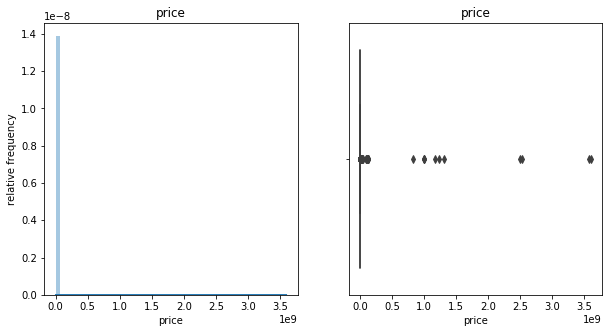

In [7]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(df.price,ax=ax[0]);
sns.boxplot(df.price,ax=ax[1]);
ax[0].set_title("price");
ax[0].set_ylabel('relative frequency')
ax[1].set_title("price");

In [8]:
print('Number of cars marked at price zero in the data frame: {:.0f}'.format(df.price[(df['price']==0)].count()))
print('Number of cars marked between zero and one-hundred dollars in the data frame: {:.0f}'.format(df.price[(df['price']>0)&(df['price']<=100)].count()))
print('Quantile 0.001: {:.1f}'.format(df.price.quantile(.001)))
print('Quantile 0.999: {:.1f}'.format(df.price.quantile(.999)))
print('Number of cars beyond 0.999 quantile: {:.0f}'.format(df.price[(df['price']>df.price.quantile(.999))].count()))

Number of cars marked at price zero in the data frame: 43579
Number of cars marked between zero and one-hundred dollars in the data frame: 4365
Quantile 0.001: 0.0
Quantile 0.999: 98000.0
Number of cars beyond 0.999 quantile: 509


Text(0.5, 0.98, 'Mean Price Estimation from Tail population')

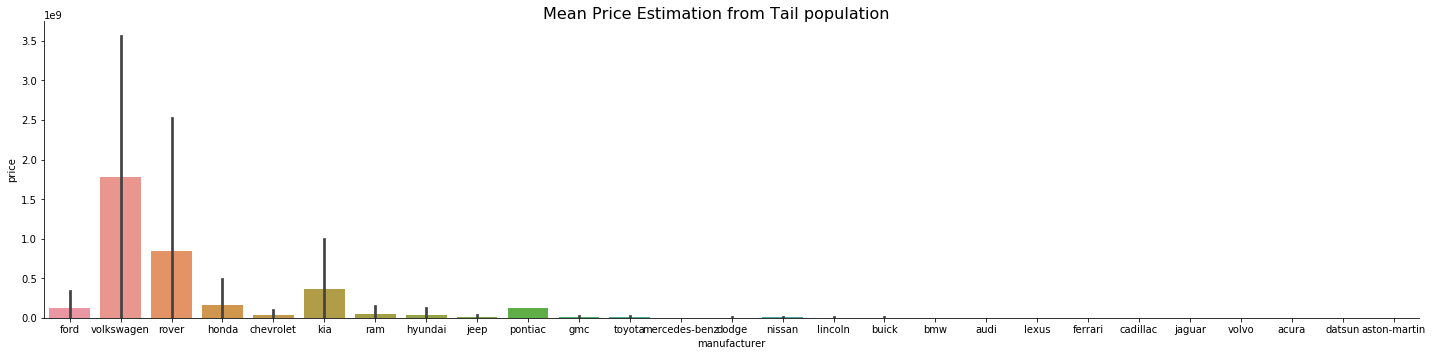

In [9]:
Tail_df=df[(df['price']>df.price.quantile(.999))].sort_values(by='price', ascending=False) # .isnull().sum().
ax = sns.catplot(x='manufacturer',y='price',data=Tail_df,kind='bar', aspect=4)
ax.fig.suptitle('Mean Price Estimation from Tail population', fontsize=16)

In [10]:
df_a=df[(df['price']>200) & (df['price']< df.price.quantile(.999))]
del df

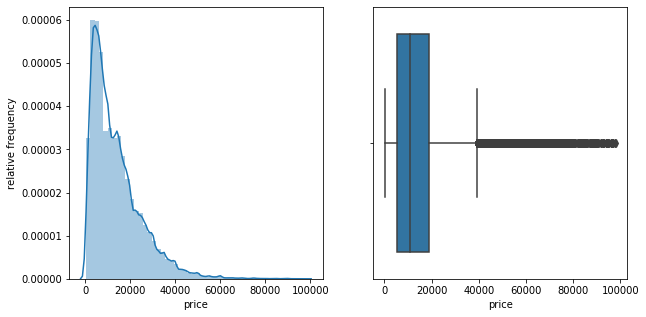

In [11]:
fig,ax = plt.subplots(1,2, figsize=(10,5))
sns.distplot(df_a.price,ax=ax[0]);
ax[0].set_ylabel('relative frequency')
sns.boxplot(df_a.price,ax=ax[1]);

In [12]:
df_a.price.describe()

count    460266.000000
mean      13697.229650
std       11113.119894
min         201.000000
25%        5485.000000
50%       10895.000000
75%       18990.000000
max       97999.000000
Name: price, dtype: float64

### 1.3 Exploratory analysis for continous variables.<a class="anchor" id="1.3."></a>
[Back to Contents](#0.)

In [13]:
categorical = df_a.dtypes == object
cont=df_a.loc[:, ~categorical].columns
cont=cont[(cont!='price')]
cont

Index(['id', 'year', 'odometer', 'county', 'lat', 'long'], dtype='object')

In [14]:
df_a[cont].describe()

,id,year,odometer,county,lat,long
count,4.602660e+05,458759.000000,3.796400e+05,0.0,454864.000000,454864.000000
mean,7.044210e+09,2009.327130,1.045199e+05,NaN,38.512072,-94.171691
std,4.937113e+06,8.651674,1.072872e+05,NaN,5.910478,17.664910
min,6.995212e+09,1900.000000,0.000000e+00,NaN,-82.688100,-165.935000
25%,7.040833e+09,2006.000000,5.255700e+04,NaN,34.705500,-106.682000
50%,7.045375e+09,2011.000000,9.785200e+04,NaN,39.287800,-88.464100
75%,7.048578e+09,2015.000000,1.411082e+05,NaN,42.453100,-81.079500
max,7.050103e+09,2021.000000,1.000000e+07,NaN,81.569300,94.124800


In [15]:
for i in range(0,6):
    print('# NA in {}: {:.0f}'.format(cont[i],df_a.loc[:,cont[i]].isna().sum()))
    print('% NA in {}: {:.2f}'.format(cont[i],100 * df_a.loc[:,cont[i]].isna().sum()/df_a.loc[:,'price'].count()))

# NA in id: 0
% NA in id: 0.00
# NA in year: 1507
% NA in year: 0.33
# NA in odometer: 80626
% NA in odometer: 17.52
# NA in county: 460266
% NA in county: 100.00
# NA in lat: 5402
% NA in lat: 1.17
# NA in long: 5402
% NA in long: 1.17


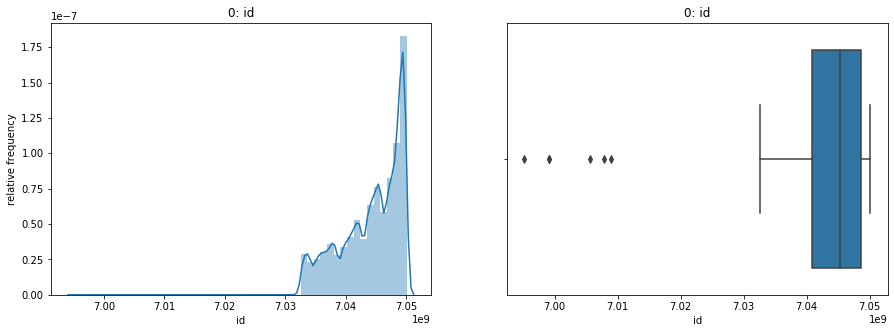

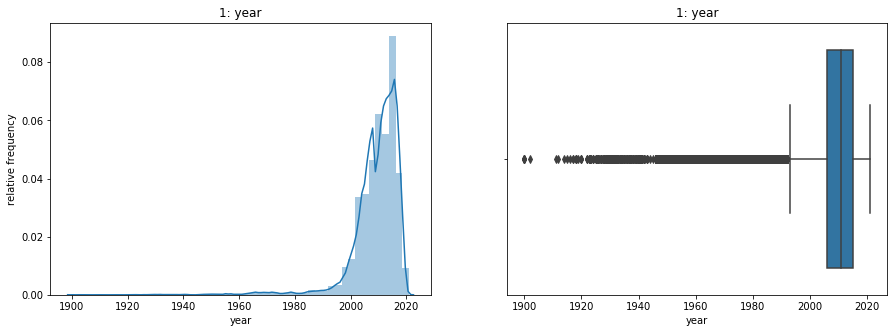

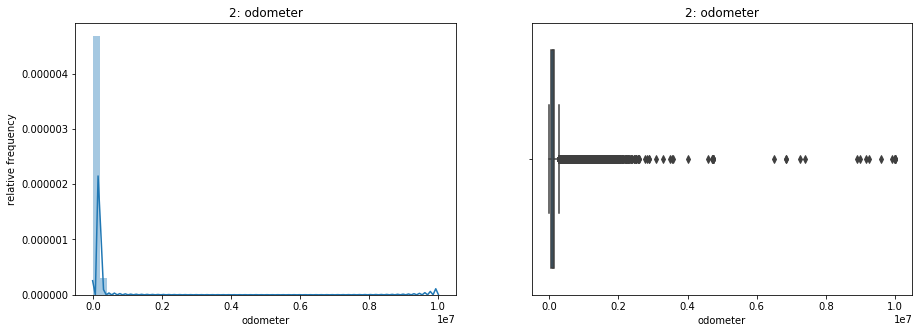

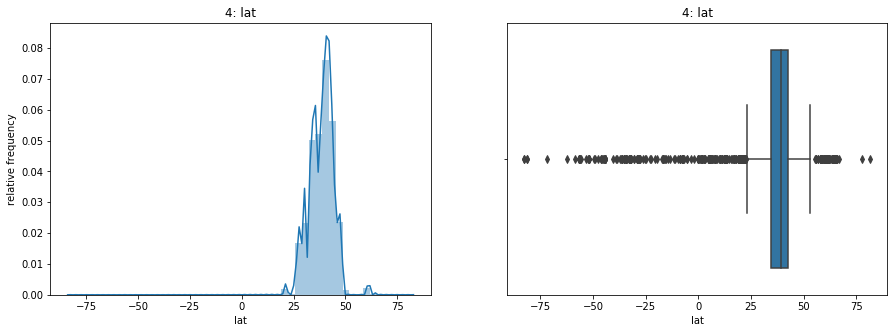

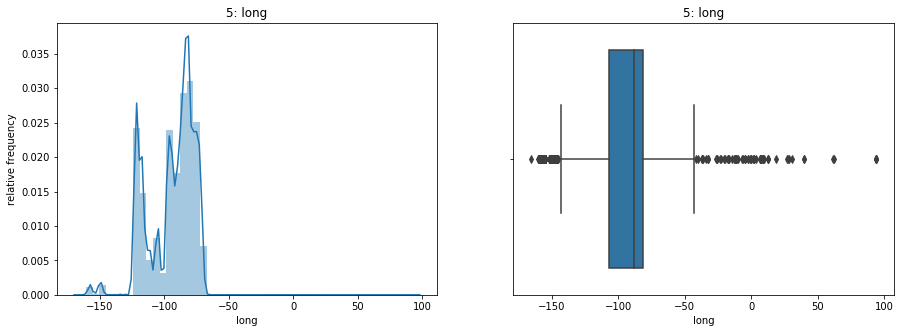

In [16]:
for i in (0,1,2,4,5):
    fig,ax = plt.subplots(1,2, figsize=(15,5))
    sns.distplot(df_a.loc[:,cont[i]][~df_a.loc[:,cont[i]].isna()],ax=ax[0]);
    sns.boxplot(df_a.loc[:,cont[i]][~df_a.loc[:,cont[i]].isna()],ax=ax[1]);
    ax[0].set_title("{}: {}".format(i, cont[i]));
    ax[0].set_ylabel('relative frequency')
    ax[1].set_title("{}: {}".format(i, cont[i]));

In [17]:
print('Number of cars marked with odometer zero in the data frame: {:.0f}'.format(df_a.odometer[(df_a['odometer']==0)].count()))
print('Quantile 0.999: {:.1f}'.format(df_a.odometer.quantile(.999)))
print('Number of cars beyond 0.999 quantile in odometer: {:.0f}'.format(df_a.odometer[(df_a['odometer']>df_a.odometer.quantile(.999))].count()))

Number of cars marked with odometer zero in the data frame: 1320
Quantile 0.999: 1000045.1
Number of cars beyond 0.999 quantile in odometer: 380


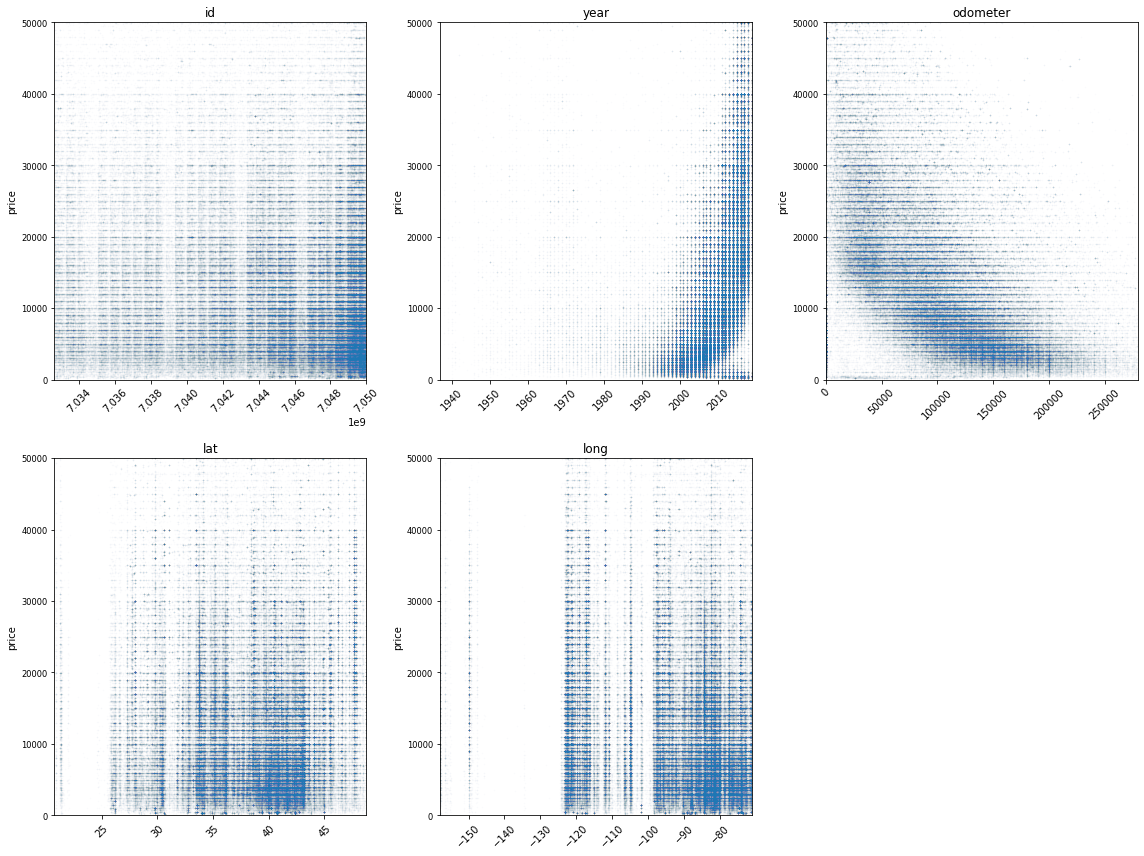

In [18]:
cont=cont[(cont!='county')]
cont
    
fig, axes = plt.subplots(2, 3, figsize=(16,12))

for i, ax in enumerate(axes.ravel()):
    if i > 4:
        ax.set_visible(False)
        continue
    ax.scatter(df_a.loc[:,cont[i]][~df_a.loc[:,cont[i]].isna()],df_a.price[~df_a.loc[:,cont[i]].isna()], s=1, alpha=0.01);
    ax.set_title(cont[i])
    ax.tick_params(axis='x', labelrotation=45)
    ax.tick_params(axis='y', labelsize='small')
    ax.set_ylabel('price')
    ax.set_xlim(df_a.loc[:,cont[i]][~df_a.loc[:,cont[i]].isna()].quantile(.001),df_a.loc[:,cont[i]][~df_a.loc[:,cont[i]].isna()].quantile(.99))
    ax.set_ylim(0,50000)
plt.tight_layout()

In [19]:
df_a[['price','id', 'year', 'odometer', 'lat', 'long']].corr(method='pearson')

,price,id,year,odometer,lat,long
price,1.000000,-0.033752,0.349558,-0.275943,0.029777,-0.134807
id,-0.033752,1.000000,-0.013764,-0.004578,-0.040028,-0.094649
year,0.349558,-0.013764,1.000000,-0.262820,0.026150,-0.019126
odometer,-0.275943,-0.004578,-0.262820,1.000000,-0.012632,0.047671
lat,0.029777,-0.040028,0.026150,-0.012632,1.000000,-0.140134
long,-0.134807,-0.094649,-0.019126,0.047671,-0.140134,1.000000


### 1.4 Exploratory analysis for categorical variables. <a class="anchor" id="1.4."></a>
[Back to Contents](#0.)

In [20]:
cat=df_a.loc[:, categorical].columns

In [21]:
df_a[cat].describe()

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,state
count,460266,460266,460266,440100,453333,259295,282625,456497,457375,457036,268390,330797,152807,332051,314865,460252,460250,460266
unique,460266,403,413,43,34126,6,8,5,6,3,161701,3,4,13,12,321751,386182,51
top,https://newhaven.craigslist.org/cto/d/milford-...,fayetteville,https://bellingham.craigslist.org,ford,f-150,excellent,6 cylinders,gas,clean,automatic,WDC0G4JB4HF164180,4wd,full-size,sedan,white,https://images.craigslist.org/00j0j_gg93xlqFjZ...,CLEAN TITLE NO ACCEDINTS 3 YEARS WARRANTY D...,ca
freq,1,3812,2947,83979,10186,128052,102496,400079,438293,413066,114,154361,83636,83286,80995,96,160,47289


In [22]:
for i in range(0,len(cat)):
    print('# NA in {}: {:.0f}'.format(cat[i],df_a.loc[:,cat[i]].isna().sum(), 100 * df_a.loc[:,cat[i]].isna().sum()/df_a.loc[:,cat[i]].count()))
    print('% NA in {}: {:.2f}'.format(cat[i],100 * df_a.loc[:,cat[i]].isna().sum()/df_a.loc[:,'price'].count()))

# NA in url: 0
% NA in url: 0.00
# NA in region: 0
% NA in region: 0.00
# NA in region_url: 0
% NA in region_url: 0.00
# NA in manufacturer: 20166
% NA in manufacturer: 4.38
# NA in model: 6933
% NA in model: 1.51
# NA in condition: 200971
% NA in condition: 43.66
# NA in cylinders: 177641
% NA in cylinders: 38.60
# NA in fuel: 3769
% NA in fuel: 0.82
# NA in title_status: 2891
% NA in title_status: 0.63
# NA in transmission: 3230
% NA in transmission: 0.70
# NA in vin: 191876
% NA in vin: 41.69
# NA in drive: 129469
% NA in drive: 28.13
# NA in size: 307459
% NA in size: 66.80
# NA in type: 128215
% NA in type: 27.86
# NA in paint_color: 145401
% NA in paint_color: 31.59
# NA in image_url: 14
% NA in image_url: 0.00
# NA in description: 16
% NA in description: 0.00
# NA in state: 0
% NA in state: 0.00


In [23]:
cat_low=['condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']
cat_high=['region','manufacturer', 'state']
cat_pot=['description']
cat_notuse=['url', 'region_url', 'vin', 'model', 'image_url']

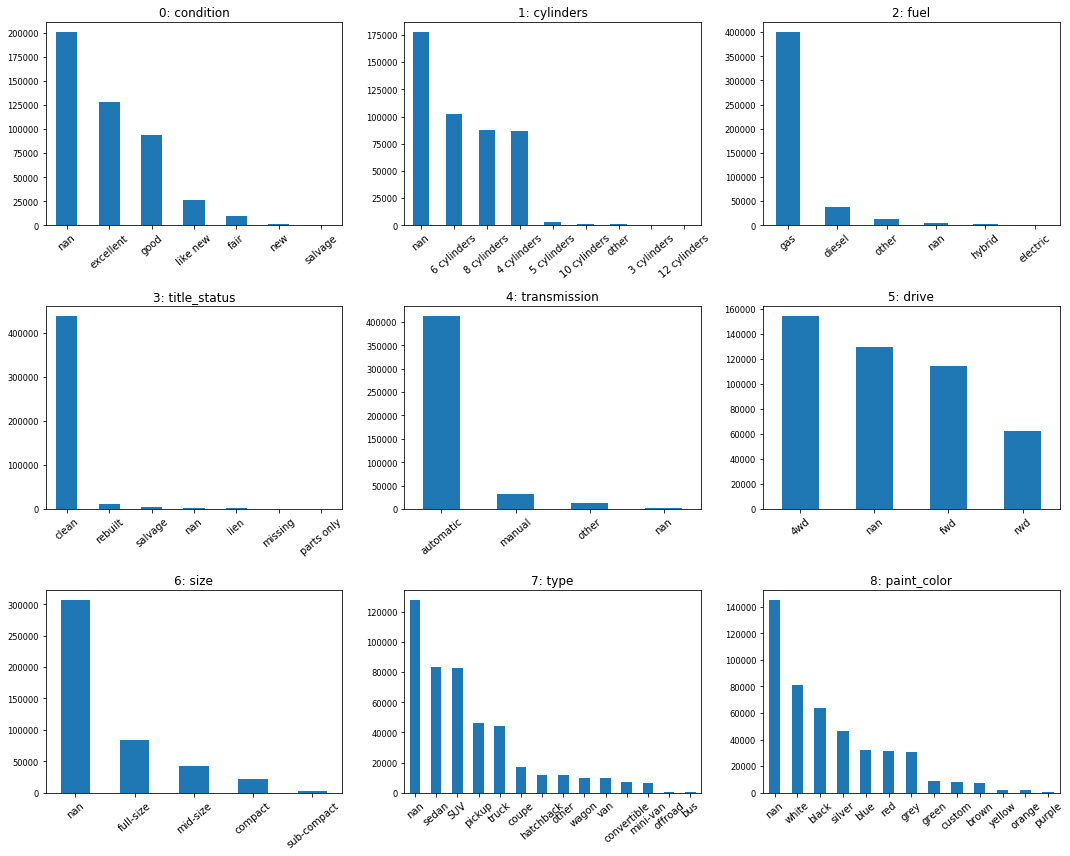

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(15,12))

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    df_a.loc[:,cat_low[i]].value_counts(dropna=False).plot.bar(ax=ax);
    ax.set_title("{}: {}".format(i, cat_low[i]))
    ax.tick_params(axis='y', labelsize='small')
    ax.tick_params(axis='x', labelrotation=40)
plt.tight_layout()

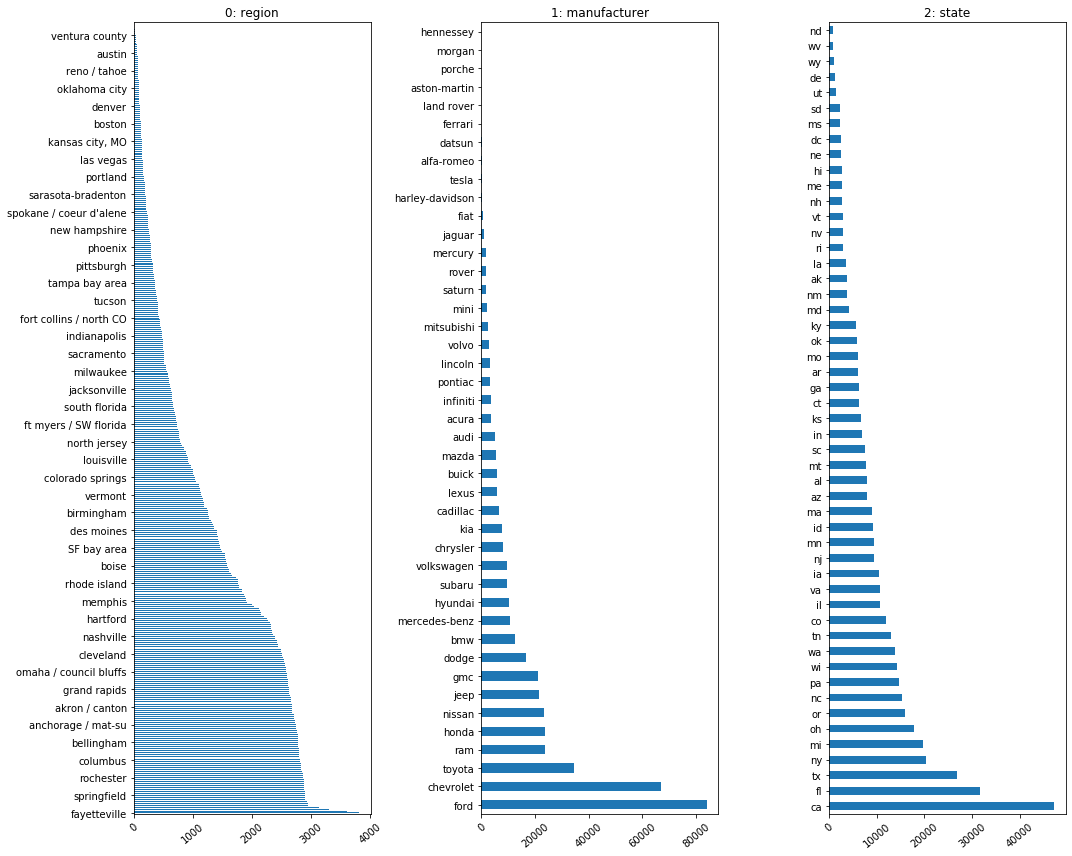

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,12))

for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    df_a.loc[:,cat_high[i]].value_counts().plot.barh(ax=ax);
    ax.set_title("{}: {}".format(i, cat_high[i]))
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelrotation=40)
    if cat_high[i]=='region':
        ax.locator_params(axis='y', nbins=50)
        continue
plt.tight_layout()

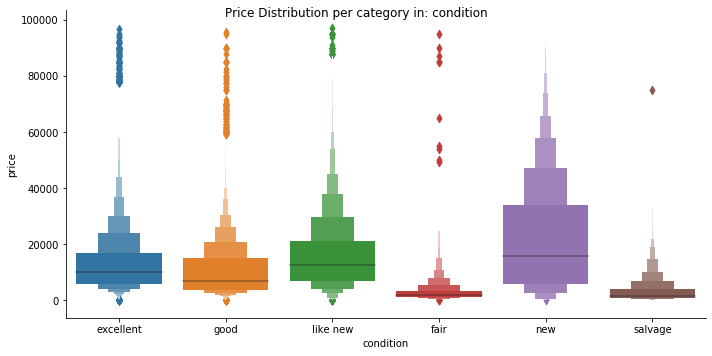

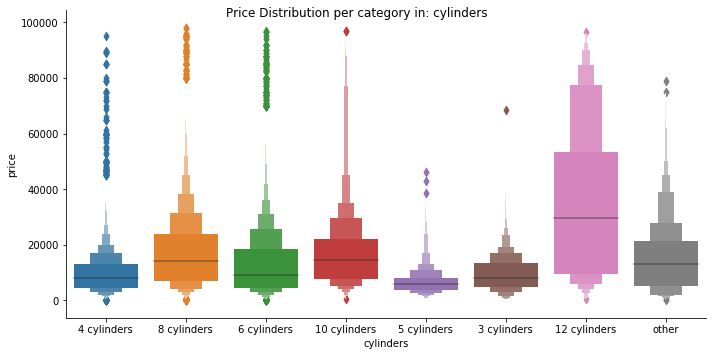

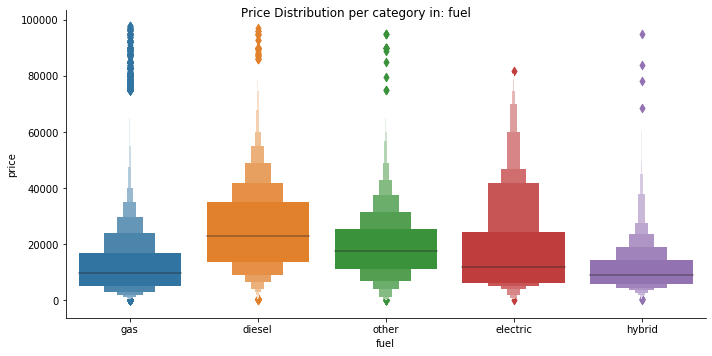

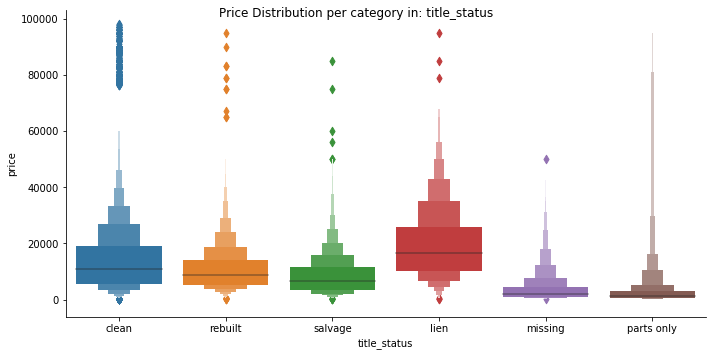

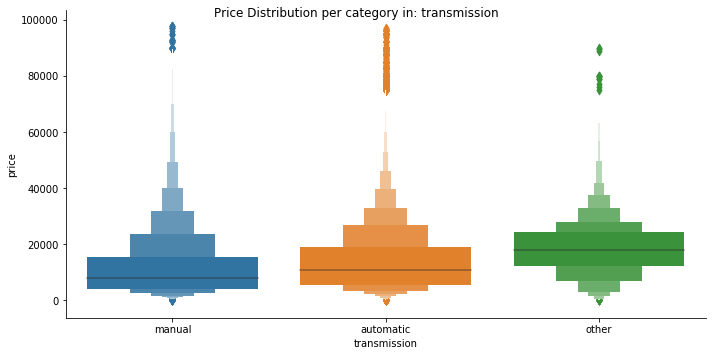

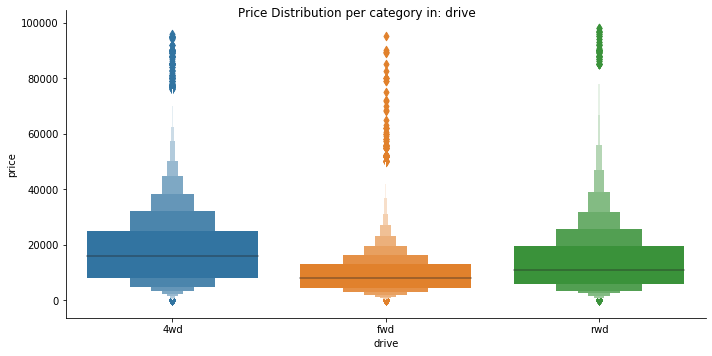

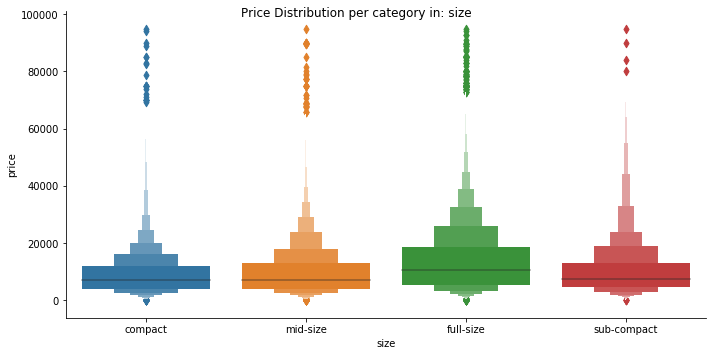

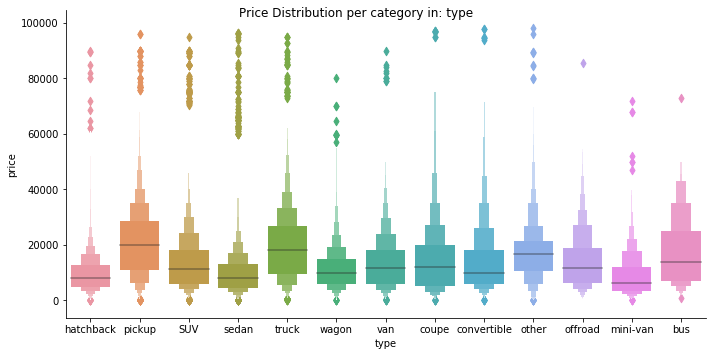

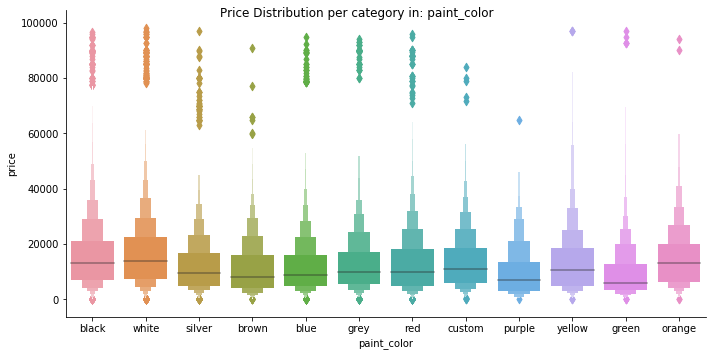

In [26]:
for i in range(0,9):
    ax=sns.catplot(x=cat_low[i],y='price',data=df_a,kind='boxen', aspect=2)
    ax.fig.suptitle('Price Distribution per category in: {}'.format(cat_low[i]), fontsize=12)

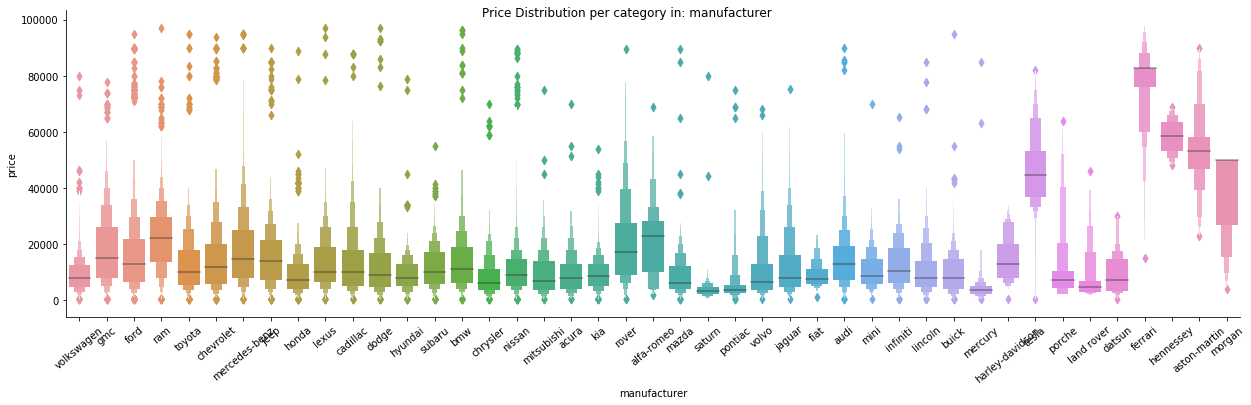

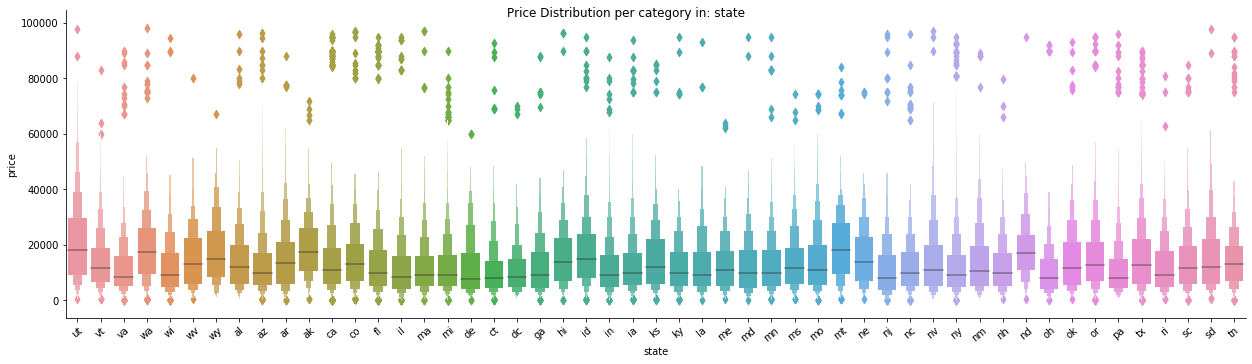

In [27]:
for i in range(1,3):
    ax=sns.catplot(x=cat_high[i],y='price',data=df_a,kind='boxen', aspect=3.5)
    ax.fig.suptitle('Price Distribution per category in: {}'.format(cat_high[i]), fontsize=12)
    ax.set_xticklabels(rotation=40)

### 1.5 Conclusions and Feature Selection. <a class="anchor" id="1.5."></a>
[Back to Contents](#0.)

- For the target feature, **price**, we can conclude that:
 - We need to drop the rows from cars reported with price zero. 
 - We need to drop the rows corresponding to extremely high prices, the information for those cases corresponds in the majority of cases to misinformed car prices.
 
 
- For continuous features, **id, year, odometer, county, lat, and long**, we can conclude the following:
    - **county** is non-informative so we can drop the entire column.
    - **id** is a specific feature associated with the price, hence this feature could leak information in the models that we will calibrate in our next steps hence, we have decided to drop this column as a potential explicative feature.
    - **year** does not present outliers in its values, and the percentage of missing values is close to 0.32%. Furthermore, the initial graphical analysis showed a positive relationship with price, and the Pearson correlation index is 0.34.
    - **odometer** does not present outliers that could rise an initial issue, we need to pay attention to those values reported as zero, these values could be classified as missing values in some cases. The missing values, NA's,  are estimated in 17.74%, which is a high value but could be managed through imputation techniques in the following modules. Also, the graphical analysis and the person correlation showed a negative relationship with price.
    - **lat and log** does not present data anomalies and the missing value percentage is low. Nevertheless, the initial graphical analysis and the person correlation showed a potential low relationship with car prices. However, we decided to keep these variables to try to extract some valuable information through more complex data transformations. 


- For categorical features with low cardinality, **condition, cylinders, fuel, title_status, transmission, drive, size, type, paint_color**, we can conclude the following:
    - Overall the variables appear in an initial analysis to be useful to model price. Through the categorical distributions plots, we can identify that some categories in some of these variables showed differentiated behavior against the feature price, for example, the category 4wd in the feature **drive** or the category 12 cylinders in the feature **cylinders**.
    - Regarding the percentages of the missing value, we need to pay attention to the features **condition, cylinders, drive, type and paint_color** that showed missing values percentages between 20% and 45%. Also, the feature **size** showed a 66.5% of missing value, this makes us think that this feature will be potentially non-informative in our future models, but at this stage is probably better to keep the variable and explore imputations techniques for this feature in future modules.


- For categorical features with high cardinality, **region, manufacturer, state**, we can conclude that the features can be useful for price prediction. However, further feature transformation like target encoding is needed to prove its feature importance in the price prediction.


- We will drop the feature **description** in order to explore the other variables and avoid NLP procedures. Although, this variable could be useful.


- For categorical features, **url, region_url, vin, model, image_url**, we will drop these columns. In particular, we think that **model** is a high categorical variable that is too specific to the car and could leak information, additionally to the fact that it is extremely difficult to standardize the information contained in this feature. Also, **url, region_url, vin, and image_url** seems not informative for this homework.

### 1.6 Sampling and Dataset (X, y). <a class="anchor" id="1.6."></a>
[Back to Contents](#0.)

In [28]:
## Create a complete Dataset for sampling
DF_Complete=df_a[['price','year', 'odometer', 'lat', 'long','condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color','region', 'manufacturer', 'state','description']]

In [29]:
## Create a subsample
DF_sub=DF_Complete.sample(frac=.3, replace=False, random_state=7) # subsample of 0.3
DF_sub.shape
del DF_Complete

In [30]:
## Create arrays y and X
y=DF_sub['price']
#X=DF_sub[['year', 'odometer','condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive','size',
          #'type', 'paint_color','region', 'manufacturer', 'state']]
X=DF_sub[['year', 'odometer', 'lat', 'long','condition', 'cylinders', 'fuel', 'title_status', 'transmission',
          'drive','size','type', 'paint_color','region', 'manufacturer', 'state']]

## 2. Preprocessing and Baseline Model <a class="anchor" id="2."></a>
[Back to Contents](#0.)

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, ShuffleSplit, RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression, LassoCV, Lasso, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer, OrdinalEncoder
from category_encoders import TargetEncoder, LeaveOneOutEncoder

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer

from sklearn.inspection import plot_partial_dependence, permutation_importance
from sklearn.feature_selection import RFE, RFECV, f_regression, SelectFromModel
from sklearn.calibration import calibration_curve
from sklearn.model_selection import cross_validate

from sklearn.metrics import r2_score
from sklearn.utils import shuffle

import shap
from scipy import stats
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


### 2.1 Train and Test Split. <a class="anchor" id="2.1."></a>
[Back to Contents](#0.)

In [32]:
quantile = list(y.quantile([0, 0.25, 0.5, 0.75, 1.0]))
y_binned = []
for price in y:
    if price<=quantile[1]:y_binned.append(1)
    elif price<=quantile[2]:y_binned.append(2)
    elif price<=quantile[3]:y_binned.append(3)
    else: y_binned.append(4)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y_binned)

### 2.2 Model fit. <a class="anchor" id="2.2."></a>
[Back to Contents](#0.)

In [34]:
# Clasification of features
cat=['condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive',
     'size', 'type', 'paint_color','region', 'manufacturer', 'state']

cat_low=['condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive',
     'size', 'type', 'paint_color']

cat_high=['region', 'manufacturer', 'state']

cont=['year', 'odometer', 'lat', 'long']

In [35]:
X_train_p = X_train.drop(cat_high, axis=1)
X_test_p = X_test.drop(cat_high, axis=1)

In [36]:
cont_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_low_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Miss')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cont_tra', cont_transformer, cont),
        ('cat_low_tra', cat_low_transformer, cat_low)])

In [37]:
ss = ShuffleSplit(n_splits=5)

reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('Regression', LinearRegression())])

res = cross_validate(reg, X_train_p, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'], return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,1.245669,0.063831,0.447056,-6.895097e+07,-5709.792451,0.447061
1,1.217741,0.053857,0.453106,-6.812365e+07,-5685.318305,0.453164
2,1.084100,0.053856,0.447901,-7.040476e+07,-5722.213068,0.447918
3,1.107038,0.054854,0.421203,-7.377615e+07,-5804.137204,0.421215
4,1.119006,0.054855,0.405705,-7.461800e+07,-5667.210170,0.405753


In [38]:
reg.fit(X_train_p, y_train)
test_score = reg.score(X_test_p, y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.43499
R^2 in the Test set : 0.43644


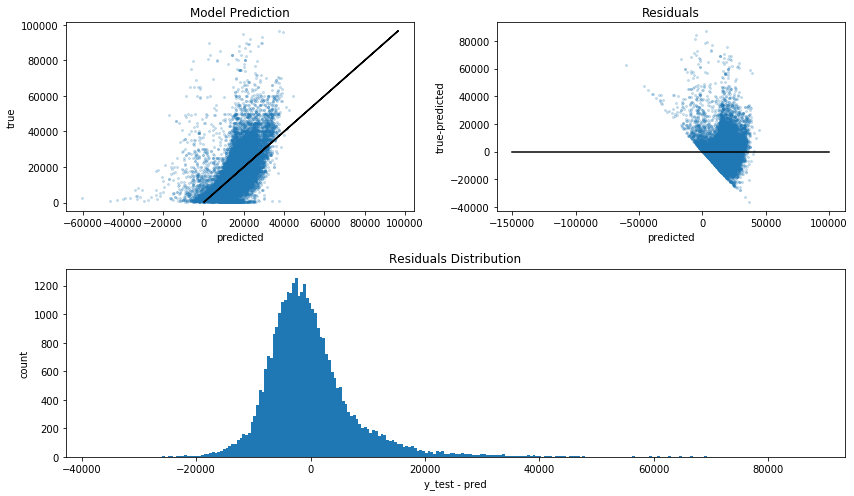

In [39]:
pred = reg.predict(X_test_p)

plt.figure(figsize=(12,7))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)

ax11.scatter(pred, y_test, alpha=0.2, s=4)
ax11.plot(y_test, y_test, '-', c='k')
ax11.set_title("Model Prediction")
ax11.set_ylabel('true')
ax11.set_xlabel('predicted')

ax12.scatter(pred, (y_test-pred), alpha=0.2, s=4)
ax12.plot([-150000, 100000], [0, 0], '-', c='k')
ax12.set_title("Residuals")
ax12.set_ylabel('true-predicted')
ax12.set_xlabel('predicted')

ax2.hist(y_test - pred, bins="auto")
ax2.set_title("Residuals Distribution")
ax2.set_xlabel("y_test - pred")
ax2.set_ylabel("count")

plt.tight_layout()

### 2.3 Conclusions on baseline model. <a class="anchor" id="2.3."></a>
[Back to Contents](#0.)

From the results above we can draw some initial conclusions about the importance of features and the adequacy of the model fit that are going to be useful in our following tasks.

- From the **model fit** we can observe that:

    - The model predicts negative prices, this seems inadequate for our model. This indicates that our baseline linear model probably is not the best choice. Furthermore, the results suggest that we possibly need to transform our target value to get an adequate range of prediction, in this case, a logarithmic transformation could be appropriate.
    
    - The average $R^2$ of our model in the cross-validation is 0.436 and in our test set is 0.436, this result suggests that our model is not overfitted, however, the explanatory power of our model is limited, although our model takes in account 14 explanatory features. Hence, this result suggests that further work needs to be done in feature engineering.
    
    - From the residual analysis, we can conclude that the residuals issue from our model are not heteroscedastic nor normally distributed. Hence, form a statistical point, the linear model does not hold the statistical hypothesis for the residuals.
  

## 3. Feature Engineering <a class="anchor" id="3."></a>
[Back to Contents](#0.)


In [40]:
cat=['condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive',
     'size', 'type', 'paint_color','region', 'manufacturer', 'state']

cat_low=['condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive',
     'size', 'type', 'paint_color']

cat_high=['region', 'manufacturer', 'state']

cat_poten=['description']

cont=['year', 'odometer']

cont_poten=['lat', 'long']

### 3.1 Improving missing values with Iterative Imputer. <a class="anchor" id="3.1."></a>
[Back to Contents](#0.)

In [41]:
#Define a function that will encode categorical features in ordinal features, 
#the objetive is to transform the categories in to numbres to use iterative encoders
# in adequate values to fit more complex imputer.

def encode(Train_set, Test_set):   
       
    data=Train_set.copy()
    data_test=Test_set.copy()
    
    encoder = OrdinalEncoder()
            
    nonulls = np.array(data.dropna())
    nonulls_test = np.array(data_test.dropna())

    impute_reshape = nonulls.reshape(-1,1)
    impute_reshape_test = nonulls_test.reshape(-1,1)
    
    
    encoder.fit(impute_reshape)
    impute_ordinal = encoder.transform(impute_reshape)
    impute_ordinal_test = encoder.transform(impute_reshape_test)
    
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    data_test.loc[data_test.notnull()] = np.squeeze(impute_ordinal_test)  
    
    return data, data_test, encoder

In [42]:
# Save the categorical variables with low cardinality encoded with ordinal values. 
#Also save the fitted encoder in a dictionary

X_train_cat_imp=pd.DataFrame(columns=cat_low)
X_test_cat_imp=pd.DataFrame(columns=cat_low)
Fitted_cat_enc= {key: None for key in cat_low}

for column in cat_low:
    data, data_test, fittedencoder = encode(X_train[column], X_test[column])
    X_train_cat_imp[column]=data
    X_test_cat_imp[column]=data_test
    Fitted_cat_enc[column]=fittedencoder

In [43]:
# Join Categorical low cardinality features with continous variables to create a data frame suitable for imputing

X_train_cat_cont_imp=X_train[cont].join(X_train[cont_poten]).join(X_train_cat_imp)
X_test_cat_cont_imp=X_test[cont].join(X_test[cont_poten]).join(X_test_cat_imp)

In [44]:
# Imputate with Iterative Imputer all the missing values in continous and low cardinality features

BR_imp = IterativeImputer()
BR_imp.fit(X_train_cat_cont_imp)
X_train_BR_imp = pd.DataFrame(data= BR_imp.transform(X_train_cat_cont_imp), columns=X_train_cat_cont_imp.columns, index=X_train.index)
X_test_BR_imp = pd.DataFrame(data= BR_imp.transform(X_test_cat_cont_imp), columns=X_test_cat_cont_imp.columns, index=X_test.index)

In [45]:
# Do an inverse transformation for all the categorical features that have been encoded as ordinal features.
# Dataframe should be identical to the training original set expect that now the NAs have a category assignated.

pd.options.mode.chained_assignment = None

for column in cat_low:

    X_train_BR_imp[column][X_train_BR_imp[column]>=X_train_cat_imp[column].max()]=X_train_cat_imp[column].max()
    X_test_BR_imp[column][X_test_BR_imp[column]>=X_test_cat_imp[column].max()]=X_test_cat_imp[column].max()
    
    X_train_BR_imp[column][X_train_BR_imp[column]<=X_train_cat_imp[column].min()]=X_train_cat_imp[column].min()
    X_test_BR_imp[column][X_test_BR_imp[column]<=X_test_cat_imp[column].min()]=X_test_cat_imp[column].min()
    
    X_train_BR_imp[column]=Fitted_cat_enc[column].inverse_transform(np.array(np.round(X_train_BR_imp[column])).reshape(-1,1))
    X_test_BR_imp[column]=Fitted_cat_enc[column].inverse_transform(np.array(np.round(X_test_BR_imp[column])).reshape(-1,1))



In [46]:
#pd.options.mode.chained_assignment = 'warn'
X_train_BR_imp.isna().sum()

year            0
odometer        0
lat             0
long            0
condition       0
cylinders       0
fuel            0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
dtype: int64

In [47]:
# For the high cardinality categoricals state, manufacturer and region we will impute with the most frecuent value
# The impact of doing this should be limited because of the low percentage of missing value 
# and the subsequent encoding that we will do in the folowing steps

imp_cat=SimpleImputer(strategy='most_frequent')

X_train_cat_high_imp=X_train.loc[:,cat_high]
X_train_cat_high_imp=imp_cat.fit_transform(X_train_cat_high_imp)
X_train_cat_high_imp=pd.DataFrame(data=X_train_cat_high_imp, columns=cat_high, index=X_train.index)

X_test_cat_high_imp=X_test.loc[:,cat_high]
X_test_cat_high_imp=imp_cat.transform(X_test_cat_high_imp)
X_test_cat_high_imp=pd.DataFrame(data=X_test_cat_high_imp, columns=cat_high, index=X_test.index)


In [48]:
# New data Data frame with the dataframe that we have created in this section

X_train_imp=X_train_BR_imp.join(X_train_cat_high_imp)
X_test_imp=X_test_BR_imp.join(X_test_cat_high_imp)

### 3.2 Creating new variables continuous and categorical. <a class="anchor" id="3.2."></a>
[Back to Contents](#0.)

In [49]:
# Create log values

X_train_imp['ln_year'] = np.log(X_train_imp['year'])
X_test_imp['ln_year'] = np.log(X_test_imp['year'])

X_train_imp['ln_odometer'] = np.log(X_train_imp['odometer']+1)
X_test_imp['ln_odometer'] = np.log(X_test_imp['odometer']+1)


In [50]:
## Create categorical variables for lat, long, year, and odometer

pd.options.mode.chained_assignment = None

## lat
labels = ["{0} - {1}".format(i, i + 10) for i in 
          range(int(np.round(X_train['lat'].min(), decimals=-1)-10), int(np.round(X_train['lat'].max(), decimals=-1)+10), 10)]

X_train_imp['lat_cat'] = pd.cut(X_train_imp['lat'], range(int(np.round(X_train['lat'].min(), decimals=-1)-10), int(np.round(X_train['lat'].max(), decimals=-1)+15), 10)
                                , right=False, labels=labels)

X_test_imp['lat_cat'] = pd.cut(X_test_imp['lat'], range(int(np.round(X_train['lat'].min(), decimals=-1)-10), int(np.round(X_train['lat'].max(), decimals=-1)+15), 10)
                                , right=False, labels=labels)

## long
labels = ["{0} - {1}".format(i, i + 10) for i in 
          range(int(np.round(X_train['long'].min(), decimals=-1)-10), int(np.round(X_train['long'].max(), decimals=-1)+50), 10)]

X_train_imp['long_cat'] = pd.cut(X_train_imp['long'], range(int(np.round(X_train['long'].min(), decimals=-1)-10), int(np.round(X_train['long'].max(), decimals=-1)+55), 10)
                                , right=False, labels=labels)

X_test_imp['long_cat'] = pd.cut(X_test_imp['long'], range(int(np.round(X_train['long'].min(), decimals=-1)-10), int(np.round(X_train['long'].max(), decimals=-1)+55), 10)
                                , right=False, labels=labels)

## year
labels = ["{0} - {1}".format(i, i + 10) for i in 
          range(int(np.round(X_train['year'].min(), decimals=-1)), int(np.round(X_train['year'].max(), decimals=-1)+10), 10)]

X_train_imp['year_cat'] = pd.cut(X_train_imp['year'], range(int(np.round(X_train['year'].min(), decimals=-1)), int(np.round(X_train['year'].max(), decimals=-1)+15), 10)
                                 , right=False, labels=labels)

X_test_imp['year_cat'] = pd.cut(X_test_imp['year'], range(int(np.round(X_train['year'].min(), decimals=-1)), int(np.round(X_train['year'].max(), decimals=-1)+15), 10)
                                 , right=False, labels=labels)

## year truncated, we are going put in a category those cars that are older than 1990, and we are going to give more granularity to recent years

X_train_imp['year_cat_tr']=X_train_imp['year'].copy()
X_train_imp['year_cat_tr'][X_train_imp['year_cat_tr']<=1990]=1990

labels = ["{0} - {1}".format(i, i + 5) for i in range(1990,2025,5)]

X_train_imp['year_cat_tr'] = pd.cut(X_train_imp['year_cat_tr'], range(1990,2030,5), right=False, labels=labels)

X_test_imp['year_cat_tr']=X_test_imp['year'].copy()
X_test_imp['year_cat_tr'][X_test_imp['year_cat_tr']<=1990]=1990
X_test_imp['year_cat_tr'] = pd.cut(X_test_imp['year_cat_tr'], range(1990,2030,5), right=False, labels=labels)

## odometer truncated, at 200,000 

X_train_imp['odometer_cat_tr']=X_train_imp['odometer'].copy()
X_train_imp['odometer_cat_tr'][X_train_imp['odometer_cat_tr']>=200000]=200000

labels = ["{0} - {1}".format(i, i + 10000) for i in range(0,210000,10000)]

X_train_imp['odometer_cat_tr'] = pd.cut(X_train_imp['odometer_cat_tr'], range(0,220000,10000), right=False, labels=labels)

X_test_imp['odometer_cat_tr']=X_test_imp['odometer'].copy()
X_test_imp['odometer_cat_tr'][X_test_imp['odometer_cat_tr']>=200000]=200000
X_test_imp['odometer_cat_tr'] = pd.cut(X_test_imp['odometer_cat_tr'], range(0,220000,10000), right=False, labels=labels)

In [51]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103560 entries, 446120 to 202246
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   year             103560 non-null  float64 
 1   odometer         103560 non-null  float64 
 2   lat              103560 non-null  float64 
 3   long             103560 non-null  float64 
 4   condition        103560 non-null  object  
 5   cylinders        103560 non-null  object  
 6   fuel             103560 non-null  object  
 7   title_status     103560 non-null  object  
 8   transmission     103560 non-null  object  
 9   drive            103560 non-null  object  
 10  size             103560 non-null  object  
 11  type             103560 non-null  object  
 12  paint_color      103560 non-null  object  
 13  region           103560 non-null  object  
 14  manufacturer     103560 non-null  object  
 15  state            103560 non-null  object  
 16  ln_year        

### 3.3 Bayesian encoders and One-Hot encoders. <a class="anchor" id="3.3."></a>
[Back to Contents](#0.)

In [52]:
n_cat_low = list(X_train_imp.select_dtypes('category').columns)

In [53]:
# One-Hot Encoding new categorical with low cardinality

ce2 = OneHotEncoder(handle_unknown='ignore').fit(X_train_imp[n_cat_low])
X_train_imp_n_cat_low=pd.DataFrame(data=ce2.transform(X_train_imp[n_cat_low]).toarray(), columns=ce2.get_feature_names(n_cat_low), index=X_train.index)
X_test_imp_n_cat_low=pd.DataFrame(data=ce2.transform(X_test_imp[n_cat_low]).toarray(), columns=ce2.get_feature_names(n_cat_low), index=X_test.index)

In [54]:
# One-Hot Encoding original categorical with low cardinality, remember that because of the new handling of missing we have a different hot encoding

ce3 = OneHotEncoder(handle_unknown='ignore').fit(X_train_imp[cat_low])
X_train_imp_cat_low=pd.DataFrame(data=ce3.transform(X_train_imp[cat_low]).toarray(), columns=ce3.get_feature_names(cat_low), index=X_train.index)
X_test_imp_cat_low=pd.DataFrame(data=ce3.transform(X_test_imp[cat_low]).toarray(), columns=ce3.get_feature_names(cat_low), index=X_test.index)

In [55]:
# Encode high cardinality categorical features with targetencoder and leaveoneoutencoder

te = TargetEncoder().fit(X_train_imp[cat_high], y_train)
X_train_imp_cat_high_te=te.transform(X_train_imp[cat_high])
X_test_imp_cat_high_te=te.transform(X_test_imp[cat_high])

X_train_imp_cat_high_te.columns=X_train_imp_cat_high_te.add_suffix('_te').columns
X_test_imp_cat_high_te.columns=X_test_imp_cat_high_te.add_suffix('_te').columns

loo = LeaveOneOutEncoder().fit(X_train_imp[cat_high], y_train)
X_train_imp_cat_high_loo=loo.transform(X_train_imp[cat_high])
X_test_imp_cat_high_loo=loo.transform(X_test_imp[cat_high])

X_train_imp_cat_high_loo.columns=X_train_imp_cat_high_te.add_suffix('_loo').columns
X_test_imp_cat_high_loo.columns=X_test_imp_cat_high_te.add_suffix('_loo').columns


### 3.4 Polynomial features and Scaling for continous features. <a class="anchor" id="3.4."></a>
[Back to Contents](#0.)

In [56]:
# Use standard scaler for all continuous features

comp_cont=['year','odometer','lat', 'long', 'ln_year', 'ln_odometer']

scaler = StandardScaler()
scaler.fit(X_train_imp[comp_cont])
X_train_imp_comp_cont=pd.DataFrame(data=scaler.transform(X_train_imp[comp_cont]), columns=comp_cont, index=X_train.index )
X_test_imp_comp_cont=pd.DataFrame(data=scaler.transform(X_test_imp[comp_cont]), columns=comp_cont, index=X_test.index )

X_train_imp_comp_cont.columns=X_train_imp_comp_cont.add_prefix('std_').columns
X_test_imp_comp_cont.columns=X_test_imp_comp_cont.add_prefix('std_').columns


In [57]:
# Create Polynomial features of second degree for the continous standarized features

poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_imp_comp_cont)
X_train_poly = poly.transform(X_train_imp_comp_cont)
X_test_poly = poly.transform(X_test_imp_comp_cont)
poly_features=poly.get_feature_names()

In [58]:
# Transfrom names to something more explicit

comp_cont_shrt=['yr','odm','lat', 'lon', 'lyr', 'lodm']
xs=['x0','x1','x2', 'x3', 'x4', 'x5']

poly_col=poly_features

for i in range(0,6):
    poly_col = [sub.replace(xs[i], comp_cont_shrt[i]) for sub in poly_col] 

poly_col = [sub.replace(' ','_') for sub in poly_col]

In [59]:
# Create DF and drop repeted variables

X_train_imp_poly=pd.DataFrame(data=X_train_poly, columns=poly_col, index=X_train.index)
X_test_imp_poly=pd.DataFrame(data=X_test_poly, columns=poly_col, index=X_test.index)

X_train_imp_poly=X_train_imp_poly.drop(comp_cont_shrt, axis=1)
X_test_imp_poly=X_test_imp_poly.drop(comp_cont_shrt, axis=1)


### 3.5 Feature interaction, continous and categorical. <a class="anchor" id="3.5."></a>
[Back to Contents](#0.)

In [60]:
# In this section we will create variables that will be the product of one continous variable and one categorical

SubSet_imp_comp_cont=['std_ln_year']
Subset_cat_low=['condition','fuel', 'transmission']
Subset_n_cat_low=['year_cat_tr', 'odometer_cat_tr']

X_train_imp_Mult=pd.DataFrame(index=X_train.index)
X_test_imp_Mult=pd.DataFrame(index=X_test.index)


#Interaction continous vs categorical

for item_cont in SubSet_imp_comp_cont:
    
    for item_cat in Subset_cat_low:

        ceX = OneHotEncoder(handle_unknown='ignore').fit(np.array(X_train_imp[item_cat]).reshape(-1,1))
        dataX = ceX.transform(np.array(X_train_imp[item_cat]).reshape(-1,1)).toarray()
        XX=np.array(X_train_imp_comp_cont[item_cont]).reshape(-1,1)*dataX
        dfx=pd.DataFrame(data= XX, columns=ceX.get_feature_names([item_cat]), index=X_train.index)
        dfx.columns=dfx.add_prefix(item_cont+'_').columns
        X_train_imp_Mult=X_train_imp_Mult.join(dfx)

        dataY=ceX.transform(np.array(X_test_imp[item_cat]).reshape(-1,1)).toarray()
        YY=np.array(X_test_imp_comp_cont[item_cont]).reshape(-1,1)*dataY
        dfy=pd.DataFrame(data= YY, columns=ceX.get_feature_names([item_cat]), index=X_test.index )
        dfy.columns=dfy.add_prefix(item_cont+'_').columns
        X_test_imp_Mult=X_test_imp_Mult.join(dfy)


#Interaction continous vs new categorical

for item_cont in SubSet_imp_comp_cont:
    
    for item_cat in Subset_n_cat_low:

        ceX = OneHotEncoder(handle_unknown='ignore').fit(np.array(X_train_imp[item_cat]).reshape(-1,1))
        dataX = ceX.transform(np.array(X_train_imp[item_cat]).reshape(-1,1)).toarray()
        XX=np.array(X_train_imp_comp_cont[item_cont]).reshape(-1,1)*dataX
        dfx=pd.DataFrame(data= XX, columns=ceX.get_feature_names([item_cat]), index=X_train.index)
        dfx.columns=dfx.add_prefix(item_cont+'_').columns
        X_train_imp_Mult=X_train_imp_Mult.join(dfx)

        dataY=ceX.transform(np.array(X_test_imp[item_cat]).reshape(-1,1)).toarray()
        YY=np.array(X_test_imp_comp_cont[item_cont]).reshape(-1,1)*dataY
        dfy=pd.DataFrame(data= YY, columns=ceX.get_feature_names([item_cat]), index=X_test.index )
        dfy.columns=dfy.add_prefix(item_cont+'_').columns
        X_test_imp_Mult=X_test_imp_Mult.join(dfy)
       

- Cleaning some of the auxiliary objects created to free memory

In [61]:
#del X_train_BR_imp, X_train_cat_cont_imp, X_train_cat_high, X_train_cat_high_imp, X_train_cat_imp, X_train_cat_low, X_train_cont, dfx,

In [62]:
#del X_test_BR_imp, X_test_cat_cont_imp, X_test_cat_high, X_test_cat_high_imp, X_test_cat_imp, X_test_cat_low, X_test_cont, dfy

In [63]:
#del XX, X_test_poly, X_train_poly, YY, axes, corr, corr_linkage, dataX, dataY, dendro_idx, f_values, p_values, perm_reg_test, pred, shap_reg

### 3.6 Model Improvement and Conclusions on Feature engineering improvements. <a class="anchor" id="3.6."></a>
[Back to Contents](#0.)

- First, we are going to refit our base model with the same variables that we use in section 1. The objective is to show the gain that our imputation method generated in the score of the model

In [64]:
X_train_ini_imp = X_train_imp_comp_cont[['std_year','std_odometer']].join(X_train_imp_cat_low)
X_test_ini_imp = X_test_imp_comp_cont[['std_year','std_odometer']].join(X_test_imp_cat_low)

In [65]:
reg1 = LinearRegression()
reg1.fit(X_train_ini_imp, y_train)
res = cross_validate(reg1, X_train_ini_imp, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'],return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,0.439826,0.005981,0.421272,-7.161110e+07,-5837.281660,0.421426
1,0.413892,0.004987,0.250551,-9.440731e+07,-5828.380673,0.250675
2,0.360038,0.006980,0.421980,-7.006039e+07,-5749.347142,0.422066
3,0.355043,0.005984,0.419535,-7.045323e+07,-5747.616287,0.419538
4,0.350065,0.004987,0.412267,-7.105431e+07,-5743.649092,0.412286


In [66]:
test_score = reg1.score(X_test_ini_imp, y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.38512
R^2 in the Test set : 0.41561


- Now, we are going to refit the model introducing the logarithmic, polynomial transformations and the original categorical variables

In [67]:
X_train_ini_imp = X_train_imp_comp_cont.join(X_train_imp_poly).join(X_train_imp_cat_low)
X_test_ini_imp = X_test_imp_comp_cont.join(X_test_imp_poly).join(X_test_imp_cat_low)

In [68]:
reg2 = LinearRegression()
reg2.fit(X_train_ini_imp, y_train)
res = cross_validate(reg2, X_train_ini_imp, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'],return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,0.519606,0.006983,0.618853,-4.669872e+07,-4470.705350,0.618857
1,0.535573,0.009967,0.620882,-4.606649e+07,-4468.715563,0.620889
2,0.519610,0.006981,0.630839,-4.627661e+07,-4509.987180,0.630849
3,0.521605,0.006981,0.630231,-4.368907e+07,-4455.309074,0.630232
4,0.518613,0.006984,0.619039,-4.759098e+07,-4473.953078,0.619039


In [69]:
test_score = reg2.score(X_test_ini_imp, y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.62397
R^2 in the Test set : 0.63020


- Furthermore, we are going to try in a stand-alone basis the set of variables issued from the multiplication of categoricals and transformed continous

In [70]:
X_train_ini_imp = X_train_imp_Mult
X_test_ini_imp =  X_test_imp_Mult

In [71]:
reg3 = LinearRegression()
reg3.fit(X_train_ini_imp, y_train)
res = cross_validate(reg3, X_train_ini_imp, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'],return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,0.215423,0.006983,0.371210,-7.731483e+07,-6253.692046,0.371225
1,0.221410,0.005981,0.382130,-7.720893e+07,-6252.679294,0.382193
2,0.220407,0.005984,0.367962,-7.932951e+07,-6333.040960,0.367984
3,0.212431,0.006981,0.397595,-7.584979e+07,-6229.632901,0.397740
4,0.224400,0.004987,0.397059,-7.777181e+07,-6267.650449,0.397165


In [72]:
test_score = reg3.score(X_test_ini_imp, y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.38319
R^2 in the Test set : 0.39245


- Finally, we can prove the model with all the variables built in this section. The objective is to fit the best posible base model with a more detail feature engineering

In [73]:
X_train_ini_imp = X_train_imp_comp_cont.join(X_train_imp_poly).join(X_train_imp_cat_low).join(X_train_imp_cat_high_loo).join(X_train_imp_Mult)
X_test_ini_imp = X_test_imp_comp_cont.join(X_test_imp_poly).join(X_test_imp_cat_low).join(X_test_imp_cat_high_loo).join(X_test_imp_Mult)

In [74]:
reg4 = LinearRegression()
reg4.fit(X_train_ini_imp, y_train)
res = cross_validate(reg4, X_train_ini_imp, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'],return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,0.912556,0.009972,0.646279,-4.389300e+07,-4334.284053,0.646284
1,0.915551,0.006981,0.643079,-4.618316e+07,-4374.237630,0.643079
2,0.947467,0.009971,0.649391,-4.439919e+07,-4383.675839,0.649425
3,1.063156,0.010970,0.612326,-4.715650e+07,-4358.960884,0.612434
4,0.957439,0.009973,0.640330,-4.607543e+07,-4469.093627,0.640418


In [75]:
test_score = reg4.score(X_test_ini_imp, y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.63828
R^2 in the Test set : 0.65326


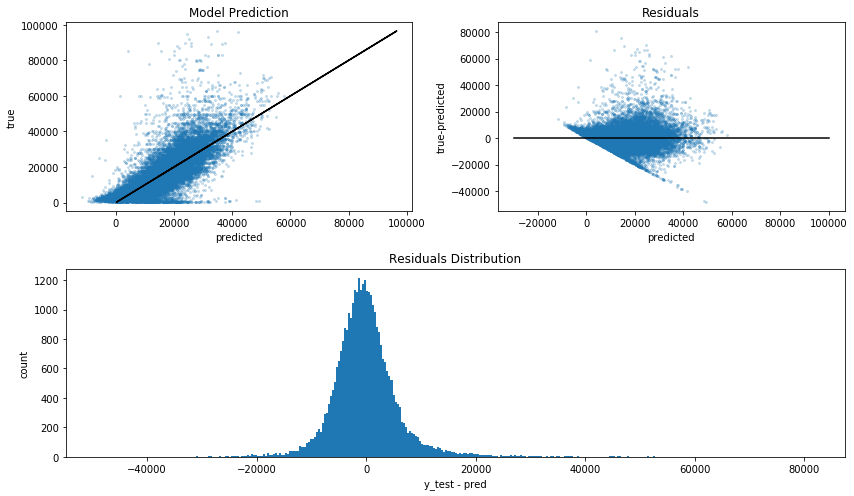

In [76]:
pred = reg4.predict(X_test_ini_imp)

plt.figure(figsize=(12,7))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)

ax11.scatter(pred, y_test, alpha=0.2, s=4)
ax11.plot(y_test, y_test, '-', c='k')
ax11.set_title("Model Prediction")
ax11.set_ylabel('true')
ax11.set_xlabel('predicted')

ax12.scatter(pred, (y_test-pred), alpha=0.2, s=4)
ax12.plot([-30000, 100000], [0, 0], '-', c='k')
ax12.set_title("Residuals")
ax12.set_ylabel('true-predicted')
ax12.set_xlabel('predicted')

ax2.hist(y_test - pred, bins="auto")
ax2.set_title("Residuals Distribution")
ax2.set_xlabel("y_test - pred")
ax2.set_ylabel("count")

plt.tight_layout()

In [77]:
p = stats.normaltest(y_test - pred)
print('The p-value of a normal test in the residuals is: {:.5f}'.format(p[1]))

The p-value of a normal test in the residuals is: 0.00000


From this section 3) can draw conclusions about the importance of a detailed feature engineering and furthermore we can anticipate some features taht will be relevant in our following steps.
- From the **models** above we can observe that:

    - The proposed methodology of imputation of missing values did not improve the $R^2$ of the model.

    - the combination of including  the polynomial transformations, logarithmic and original categorical transformations improved significantly our model the inclusion of this made the $R^2$ jump from 0.436 to 0.629.
    
    - The features that combined a small set of categorical variables with an also small set of polynomial and continuous variables has by itself a better $R^2$ than our original model from section 1).
    
    - The model that uses all the features designed in this section has a best $R^2$ so far with 0.65196. Furthermore, a visual inspection of the predited values showed that the model has a better fit and predict less negative values.
    


In [78]:
 del X_train_ini_imp, X_test_ini_imp

In [79]:
elapsed_time = timeit.default_timer() - start_time
elapsed_time

117.44521060000001

## 4. Other Models. <a class="anchor" id="4."></a>
[Back to Contents](#0.)


### 4.1 Preprocessing combined for modeling. <a class="anchor" id="4.1."></a>
[Back to Contents](#0.)

For this section we need to combine the preprocessing that we have carried out in sections 2) and 3). Because some of the constructions are manual and are not feasible to make inside a pipeline, we have decided to combine the variables of section 3) with some column transformers procedures to recover some of the transformed variables that we have used inside the pipeline in section 2).

In [80]:
ori_col=['year', 'odometer', 'lat', 'long','condition', 'cylinders', 'fuel', 'title_status', 'transmission',
          'drive','size','type', 'paint_color','region', 'manufacturer', 'state']

cat_low=['condition', 'cylinders', 'fuel','title_status', 'transmission', 'drive',
     'size', 'type', 'paint_color']

cat_high=['region', 'manufacturer', 'state']

cont=['year', 'odometer', 'lat', 'long']

In [81]:
# Create log values
X_train_mdl=X_train.copy()
X_test_mdl=X_test.copy()

X_train_mdl['ln_year'] = np.log(X_train_mdl['year'])
X_test_mdl['ln_year'] = np.log(X_test_mdl['year'])

X_train_mdl['ln_odometer'] = np.log(X_train_mdl['odometer']+1)
X_test_mdl['ln_odometer'] = np.log(X_test_mdl['odometer']+1)

cont=['year', 'odometer', 'lat', 'long', 'ln_year', 'ln_odometer']


In [82]:
# Sub Set 1 Preprocessing of a sub set original variables.
X_train_S1 = X_train_mdl.drop(cat_high, axis=1)
X_test_S1 = X_test_mdl.drop(cat_high, axis=1)

cont_transformer_poly = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))])

cat_low_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Miss')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('cont_tra', cont_transformer_poly, cont),
        ('cat_low_tra', cat_low_transformer, cat_low)])

X_train_S1_ori=preprocessor.fit_transform(X_train_S1)
X_test_S1_ori=preprocessor.transform(X_test_S1)

In [83]:
# Transfrom names to something more explicit

#polynomial
poly_features=preprocessor.transformers_[0][1][1].get_feature_names()
comp_cont_shrt=['yr','odm','lat', 'lon', 'lyr', 'lodm']
xs=['x0','x1','x2', 'x3', 'x4', 'x5']

poly_col=poly_features

for i in range(0,6):
    poly_col = [sub.replace(xs[i], comp_cont_shrt[i]) for sub in poly_col] 

poly_col = [sub.replace(' ','_') for sub in poly_col]

#categorical

low_cat_col = preprocessor.transformers_[1][1][1].get_feature_names(cat_low)

In [84]:
# create a DF with the the proporcess that we made in the cells above
S1_col=list(poly_col)+list(low_cat_col)
X_train_S1=pd.DataFrame(data=X_train_S1_ori, columns=S1_col, index=X_train.index)
X_test_S1=pd.DataFrame(data=X_test_S1_ori, columns=S1_col, index=X_test.index)

In [85]:
# Export Sub Set 2 and rename features constructed in section 3
# Features with high cardinality impued with leaveoneout
# Discretized odometer, year, latitud and longitud

X_train_S2 = X_train_imp_cat_high_loo
X_test_S2 = X_test_imp_cat_high_loo

X_train_S2 =X_train_S2.join(X_train_imp_n_cat_low)
X_test_S2 =X_test_S2.join(X_test_imp_n_cat_low)

In [86]:
# Create subset S3

# In this section we will create variables that will be the product of one continous variable and one categorical

SubSet_imp_comp_cont=['lyr']
Subset_cat_low=['condition','fuel', 'transmission']
Subset_n_cat_low=['year_cat_tr', 'odometer_cat_tr']


X_train_S3=pd.DataFrame(index=X_train.index)
X_test_S3=pd.DataFrame(index=X_test.index)

#Interaction continous vs categorical

imp_cat=SimpleImputer(strategy='constant', fill_value='NA')

X_train_cat_low=X_train.loc[:,cat_low]
X_train_cat_low=imp_cat.fit_transform(X_train_cat_low)
X_train_cat_low=pd.DataFrame(data=X_train_cat_low, columns=cat_low)

X_test_cat_low=X_test.loc[:,cat_low]
X_test_cat_low=imp_cat.transform(X_test_cat_low)
X_test_cat_low=pd.DataFrame(data=X_test_cat_low, columns=cat_low)


for item_cont in SubSet_imp_comp_cont:
    
    for item_cat in Subset_cat_low:
        
        ceX = OneHotEncoder(handle_unknown='ignore').fit(np.array(X_train_cat_low[item_cat]).reshape(-1,1))
        dataX = ceX.transform(np.array(X_train_cat_low[item_cat]).reshape(-1,1)).toarray()
        XX=np.array(X_train_S1[item_cont]).reshape(-1,1)*dataX
        dfx=pd.DataFrame(data= XX, columns=ceX.get_feature_names([item_cat]), index=X_train.index)
        dfx.columns=dfx.add_prefix(item_cont+'_').columns
        X_train_S3=X_train_S3.join(dfx)

        dataY=ceX.transform(np.array(X_test_imp[item_cat]).reshape(-1,1)).toarray()
        YY=np.array(X_test_S1[item_cont]).reshape(-1,1)*dataY
        dfy=pd.DataFrame(data= YY, columns=ceX.get_feature_names([item_cat]), index=X_test.index )
        dfy.columns=dfy.add_prefix(item_cont+'_').columns
        X_test_S3=X_test_S3.join(dfy)


#Interaction continous vs new categorical

for item_cont in SubSet_imp_comp_cont:
    
    for item_cat in Subset_n_cat_low:

        ceX = OneHotEncoder(handle_unknown='ignore').fit(np.array(X_train_imp[item_cat]).reshape(-1,1))
        dataX = ceX.transform(np.array(X_train_imp[item_cat]).reshape(-1,1)).toarray()
        XX=np.array(X_train_S1[item_cont]).reshape(-1,1)*dataX
        dfx=pd.DataFrame(data= XX, columns=ceX.get_feature_names([item_cat]), index=X_train.index)
        dfx.columns=dfx.add_prefix(item_cont+'_').columns
        X_train_S3=X_train_S3.join(dfx)

        dataY=ceX.transform(np.array(X_test_imp[item_cat]).reshape(-1,1)).toarray()
        YY=np.array(X_test_S1[item_cont]).reshape(-1,1)*dataY
        dfy=pd.DataFrame(data= YY, columns=ceX.get_feature_names([item_cat]), index=X_test.index )
        dfy.columns=dfy.add_prefix(item_cont+'_').columns
        X_test_S3=X_test_S3.join(dfy)



In [87]:
# Dataframes for Modeling and feature selection

X_train_mdl=X_train_S1.join(X_train_S2).join(X_train_S3)
X_test_mdl=X_test_S1.join(X_test_S2).join(X_test_S3)

In [88]:
# Update name columns by family of variables

# polynomial section

poly_col

# low cardinality categorical

low_cat_col

# high cardinality categorical

high_cat_col= ['region', 'manufacturer', 'state']

# new categorical

n_low_cat_col = X_train_S2.columns[3:]

# Multiplication

mult_col = X_test_S3.columns


### 4.2 Decision Tree Regressor. <a class="anchor" id="4.2."></a>
[Back to Contents](#0.)

In [89]:
X_train_ini_imp = X_train_mdl
X_test_ini_imp = X_test_mdl

In [90]:
%%time

regtree = DecisionTreeRegressor()

regtree_param_grid = {'max_depth': range(1, 11) }
regtree_cv = GridSearchCV(regtree, param_grid = regtree_param_grid ,cv=ss, return_train_score=True)
regtree_cv.fit(X_train_ini_imp,y_train)

print("best mean cross-validation score: {:.3f}".format(regtree_cv.best_score_))
print("best parameters: {}".format(regtree_cv.best_params_))
print("test-set score: {:.3f}".format(regtree_cv.score(X_test_ini_imp, y_test)))


best mean cross-validation score: 0.673
best parameters: {'max_depth': 10}
test-set score: 0.656
Wall time: 2min 28s


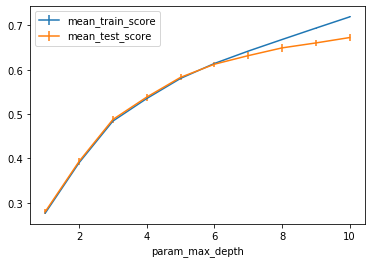

In [91]:
scores = pd.DataFrame(regtree_cv.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

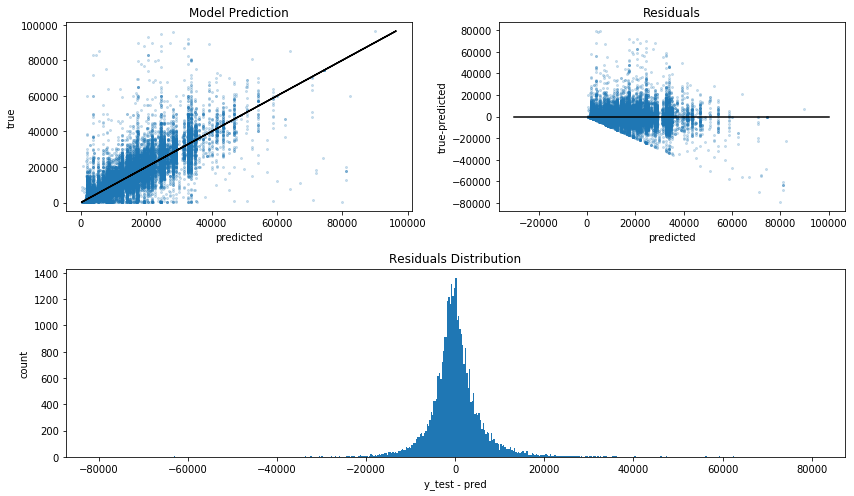

In [92]:
pred = regtree_cv.predict(X_test_ini_imp)

plt.figure(figsize=(12,7))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)

ax11.scatter(pred, y_test, alpha=0.2, s=4)
ax11.plot(y_test, y_test, '-', c='k')
ax11.set_title("Model Prediction")
ax11.set_ylabel('true')
ax11.set_xlabel('predicted')

ax12.scatter(pred, (y_test-pred), alpha=0.2, s=4)
ax12.plot([-30000, 100000], [0, 0], '-', c='k')
ax12.set_title("Residuals")
ax12.set_ylabel('true-predicted')
ax12.set_xlabel('predicted')

ax2.hist(y_test - pred, bins="auto")
ax2.set_title("Residuals Distribution")
ax2.set_xlabel("y_test - pred")
ax2.set_ylabel("count")

plt.tight_layout()

### 4.3 Gradient Boosting. <a class="anchor" id="4.3."></a>
[Back to Contents](#0.)

In [93]:
X_train_ini_imp = X_train_mdl
X_test_ini_imp = X_test_mdl

In [94]:
%%time

gbrt = GradientBoostingRegressor(n_estimators=10, learning_rate=.3, random_state=0)

gbrt_param_grid = {'max_depth': range(1, 11) }
gbrt_cv = GridSearchCV(gbrt, param_grid = gbrt_param_grid ,cv=ss, return_train_score=True)
gbrt_cv.fit(X_train_ini_imp,y_train)

print("best mean cross-validation score: {:.3f}".format(gbrt_cv.best_score_))
print("best parameters: {}".format(gbrt_cv.best_params_))
print("test-set score: {:.3f}".format(gbrt_cv.score(X_test_ini_imp, y_test)))


best mean cross-validation score: 0.761
best parameters: {'max_depth': 10}
test-set score: 0.737
Wall time: 1h 47min 35s


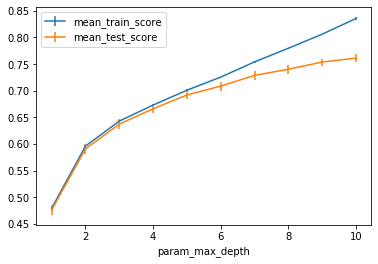

In [95]:
scores = pd.DataFrame(gbrt_cv.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

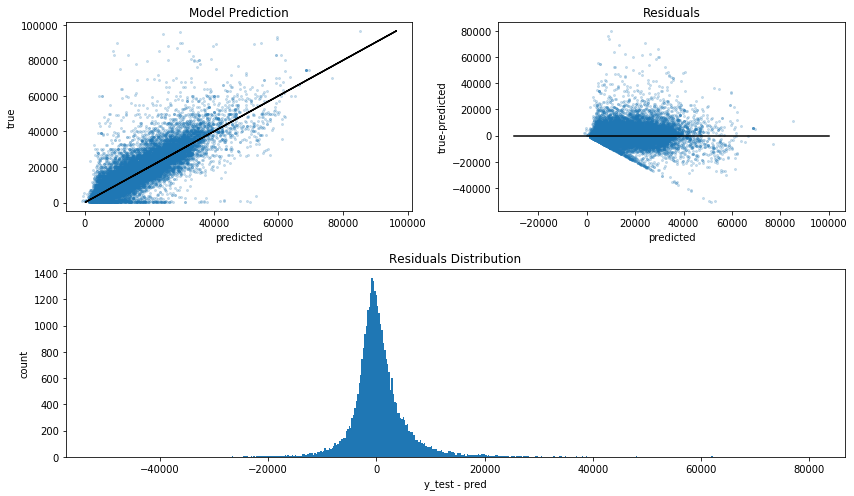

In [96]:
pred = gbrt_cv.predict(X_test_ini_imp)

plt.figure(figsize=(12,7))
ax11 = plt.subplot(2, 2, 1)
ax12 = plt.subplot(2, 2, 2)
ax2 = plt.subplot(2, 1, 2)

ax11.scatter(pred, y_test, alpha=0.2, s=4)
ax11.plot(y_test, y_test, '-', c='k')
ax11.set_title("Model Prediction")
ax11.set_ylabel('true')
ax11.set_xlabel('predicted')

ax12.scatter(pred, (y_test-pred), alpha=0.2, s=4)
ax12.plot([-30000, 100000], [0, 0], '-', c='k')
ax12.set_title("Residuals")
ax12.set_ylabel('true-predicted')
ax12.set_xlabel('predicted')

ax2.hist(y_test - pred, bins="auto")
ax2.set_title("Residuals Distribution")
ax2.set_xlabel("y_test - pred")
ax2.set_ylabel("count")

plt.tight_layout()

### 4.4 Conclusions on additional models. <a class="anchor" id="4.4."></a>
[Back to Contents](#0.)

We have tunned the max-depth of two additional models, Decision Tree Regressor and Gradient Boosting Regressor, from the results above we can conclude that:

- Gradient Boosting Regressor gives us a better $R^2$, 0.74, and shows a better fit on the data according to the visual inspection.
- Regarding its parameter tunning, between a max depth of 8 and the maximum proved 10. The gains in $R^2$ are limited, hence, to avoid overfitting, it is recommendable not to continue to increase the depth of the tree beyond 8, which is already difficult to interpret. 

## 5. Feature selection. <a class="anchor" id="5."></a>
[Back to Contents](#0.)


### 5.1 Feature Importance, Importance Permutation and SHAP. <a class="anchor" id="5.1."></a>
[Back to Contents](#0.)

In [97]:
# Estimation of the Coefficient importance in the best_estimator in the Gradient Boosting Regressor

Table_coef=pd.DataFrame(list(zip(X_test_ini_imp.columns, gbrt_cv.best_estimator_.feature_importances_)),  
                            columns =['Feature', 'Importance Value'])
Table_coef_ord=Table_coef.sort_values(by='Importance Value', ascending=False)

In [98]:
perm_reg_test = permutation_importance(gbrt_cv.best_estimator_, X_test_ini_imp, y_test)['importances_mean']

In [99]:
Table_perm=pd.DataFrame(list(zip(X_test_ini_imp.columns, perm_reg_test)),  
                            columns =['Feature', 'Permutation_importance'])
Table_perm_ord=Table_perm.sort_values(by='Permutation_importance', ascending=False)

In [100]:
def shap_trees(model, X_train, X_test, approximate=False, tree_limit=None):
    tree_explainer = shap.TreeExplainer(model, X_train)
    shap_values = tree_explainer.shap_values(X_test, approximate=approximate, tree_limit=tree_limit)
    s = shap_values.mean(axis=0)
    s /= np.linalg.norm(s)
    return s

In [101]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

shap_GBR = shap_trees(gbrt_cv.best_estimator_, X_train_ini_imp, X_test_ini_imp, approximate=True, tree_limit=None)

Passing 103560 background samples may lead to slow runtimes. Consider using shap.sample(data, 100) to create a smaller background data set.


In [102]:
Table_shap=pd.DataFrame(list(zip(X_test_ini_imp.columns, shap_GBR )),  
                            columns =['Feature', 'SHAP'])
Table_shap_ord=Table_shap.sort_values(by='SHAP', ascending=False)

In [103]:
#Top 20 Features in Importance Value Permutation Importance and SHAP


Table_top = pd.merge(Table_coef_ord[:20], Table_perm_ord[:20], on='Feature', how='outer')
Table_top = pd.merge(Table_top, Table_shap_ord[:20], on='Feature', how='outer')

Table_top

,Feature,Importance Value,Permutation_importance,SHAP
0,yr_lyr,0.214967,0.103992,0.036044
1,yr,0.105808,0.028552,NaN
2,lyr_fuel_diesel,0.073754,0.096482,0.059174
3,drive_fwd,0.069790,0.040706,NaN
4,lyr_fuel_gas,0.067233,0.049221,NaN
5,manufacturer_te_loo,0.063403,0.085817,0.018486
6,yr^2,0.048897,0.014460,0.006684
7,drive_4wd,0.029939,0.041924,0.016857
8,cylinders_4 cylinders,0.024060,0.038179,0.038067
9,lyr_lodm,0.019949,NaN,NaN


In [104]:
# Intersection of Top 20 Features
Intersection = list(set(list(Table_coef_ord[:20]['Feature']))&set(list(Table_perm_ord[:20]['Feature']))&
                    set(list(Table_shap_ord[:20]['Feature'])))
print(Intersection)

['lyr_fuel_diesel', 'yr^2', 'yr_lyr', 'drive_4wd', 'cylinders_4 cylinders', 'odm_lyr', 'manufacturer_te_loo', 'region_te_loo']


### 5.2 Refitting Gradient Boosting with selected set <a class="anchor" id="5.2."></a>
[Back to Contents](#0.)

In [105]:
X_train_select = X_train_mdl[Intersection]
X_test_select = X_test_mdl[Intersection]

In [106]:
%%time
# Refitting the model with intersection of best features in SHAP, important features and Permutation Importance.

gbrt = GradientBoostingRegressor(n_estimators=10, learning_rate=.3, random_state=0)

gbrt_param_grid = {'max_depth': range(3, 11) }
gbrt_cv = GridSearchCV(gbrt, param_grid = gbrt_param_grid ,cv=ss, return_train_score=True)
gbrt_cv.fit(X_train_select,y_train)

print("best mean cross-validation score: {:.3f}".format(gbrt_cv.best_score_))
print("best parameters: {}".format(gbrt_cv.best_params_))
print("test-set score: {:.3f}".format(gbrt_cv.score(X_test_select, y_test)))

best mean cross-validation score: 0.706
best parameters: {'max_depth': 10}
test-set score: 0.711
Wall time: 1min 19s


In [107]:
X_train_select2 = X_train_mdl[Table_top[:20]['Feature']]
X_test_select2 = X_test_mdl[Table_top[:20]['Feature']]

In [108]:
%%time
# Refitting the model with union of best features in SHAP, important features and Permutation Importance.

gbrt = GradientBoostingRegressor(n_estimators=10, learning_rate=.3, random_state=0)

gbrt_param_grid = {'max_depth': range(3, 11) }
gbrt_cv = GridSearchCV(gbrt, param_grid = gbrt_param_grid ,cv=ss, return_train_score=True)
gbrt_cv.fit(X_train_select2,y_train)

print("best mean cross-validation score: {:.3f}".format(gbrt_cv.best_score_))
print("best parameters: {}".format(gbrt_cv.best_params_))
print("test-set score: {:.3f}".format(gbrt_cv.score(X_test_select2, y_test)))

best mean cross-validation score: 0.729
best parameters: {'max_depth': 10}
test-set score: 0.736
Wall time: 4min 5s


### 5.3 Conclusions on feature selection <a class="anchor" id="5.3."></a>
[Back to Contents](#0.)

From the results from this section we can conclude that if we keep only 12 features issue from the intersection of three evaluation methods (top 20 from feature_importance, permutation importance and Shap) our $R^2$ decrease slightly from 0.74 to 0.71, But, the gain in running time and in space is significant.

Also, we have observed that if we keep the features issue from the union of three evaluation methods (top 20 from feature_importance, permutation importance, and Shap) our $R^2$ is exactly the same in the test set 0.74.

## 6. Explianable Model. <a class="anchor" id="6."></a>
[Back to Contents](#0.)


### 6.1 Reduced Linear Model <a class="anchor" id="6.1."></a>
[Back to Contents](#0.)

In [109]:
X_train_expl = X_train_mdl[Intersection]
X_test_expl = X_test_mdl[Intersection]

In [110]:
reg = LinearRegression()
reg.fit(X_train_expl , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
res = cross_validate(reg, X_train_expl, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'],return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,0.045876,0.003989,0.528331,-6.010171e+07,-5082.149591,0.528352
1,0.029917,0.002993,0.550488,-5.507423e+07,-4968.358856,0.550488
2,0.032913,0.002991,0.540077,-5.619967e+07,-5045.395282,0.540095
3,0.028923,0.003025,0.535624,-5.858534e+07,-5004.506893,0.535634
4,0.030880,0.002992,0.541953,-5.575771e+07,-4986.106285,0.541959


In [112]:
test_score = reg.score(X_test_expl, y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.53929
R^2 in the Test set : 0.53234


In [113]:
selector = SelectFromModel(estimator=LinearRegression(), threshold=.5).fit(X_train_expl , y_train)
after_selctr = X_train_expl.columns[selector.get_support()]

In [114]:
X_train_expl = X_train_mdl[after_selctr]
X_test_expl = X_test_mdl[after_selctr]

In [115]:
reg = LinearRegression()
reg.fit(X_train_expl , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
res = cross_validate(reg, X_train_expl, y_train, scoring=['r2', 'neg_mean_squared_error','neg_mean_absolute_error',
                                                         'explained_variance'],return_train_score=False, cv=ss)
pd.DataFrame(res)

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error,test_explained_variance
0,0.027925,0.003989,0.486195,-6.448736e+07,-5415.224939,0.486196
1,0.021941,0.003989,0.478321,-6.470064e+07,-5385.172068,0.478387
2,0.027925,0.002991,0.479650,-6.241116e+07,-5317.084615,0.479861
3,0.023935,0.002992,0.475393,-6.542816e+07,-5451.836732,0.475399
4,0.021943,0.003988,0.463609,-6.474576e+07,-5423.140184,0.463610


In [117]:
test_score = reg.score(X_test_expl, y_test)
print('Average R^2 in Cross_validation : {:.5f}'.format(res['test_r2'].mean()))
print('R^2 in the Test set : {:.5f}'.format(test_score))

Average R^2 in Cross_validation : 0.47663
R^2 in the Test set : 0.47786


### 6.2 Reduced Tree <a class="anchor" id="6.2."></a>
[Back to Contents](#0.)

In [118]:
Explianable=['yr_lyr', 'lyr_fuel_gas', 'lyr_fuel_diesel', 'drive_fwd', 'manufacturer_te_loo', 'drive_4wd', 
          'cylinders_4 cylinders', 'lyr_transmission_automatic', 'yr_lodm', 'lyr_lodm', 'cylinders_8 cylinders',
          'condition_excellent', 'type_sedan', 'fuel_diesel']

In [119]:
X_train_expl = X_train_mdl[Explianable]
X_test_expl = X_test_mdl[Explianable]

In [120]:
%%time

regtree = DecisionTreeRegressor()

regtree_param_grid = {'max_leaf_nodes': range(3, 11) }
regtree_cv = GridSearchCV(regtree, param_grid = regtree_param_grid ,cv=ss, return_train_score=True)
regtree_cv.fit(X_train_expl,y_train)

print("best mean cross-validation score: {:.3f}".format(regtree_cv.best_score_))
print("best parameters: {}".format(regtree_cv.best_params_))
print("test-set score: {:.3f}".format(regtree_cv.score(X_test_expl, y_test)))

best mean cross-validation score: 0.515
best parameters: {'max_leaf_nodes': 10}
test-set score: 0.523
Wall time: 6.09 s


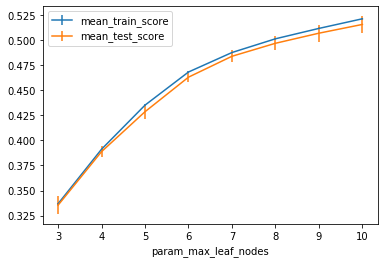

In [121]:
scores = pd.DataFrame(regtree_cv.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

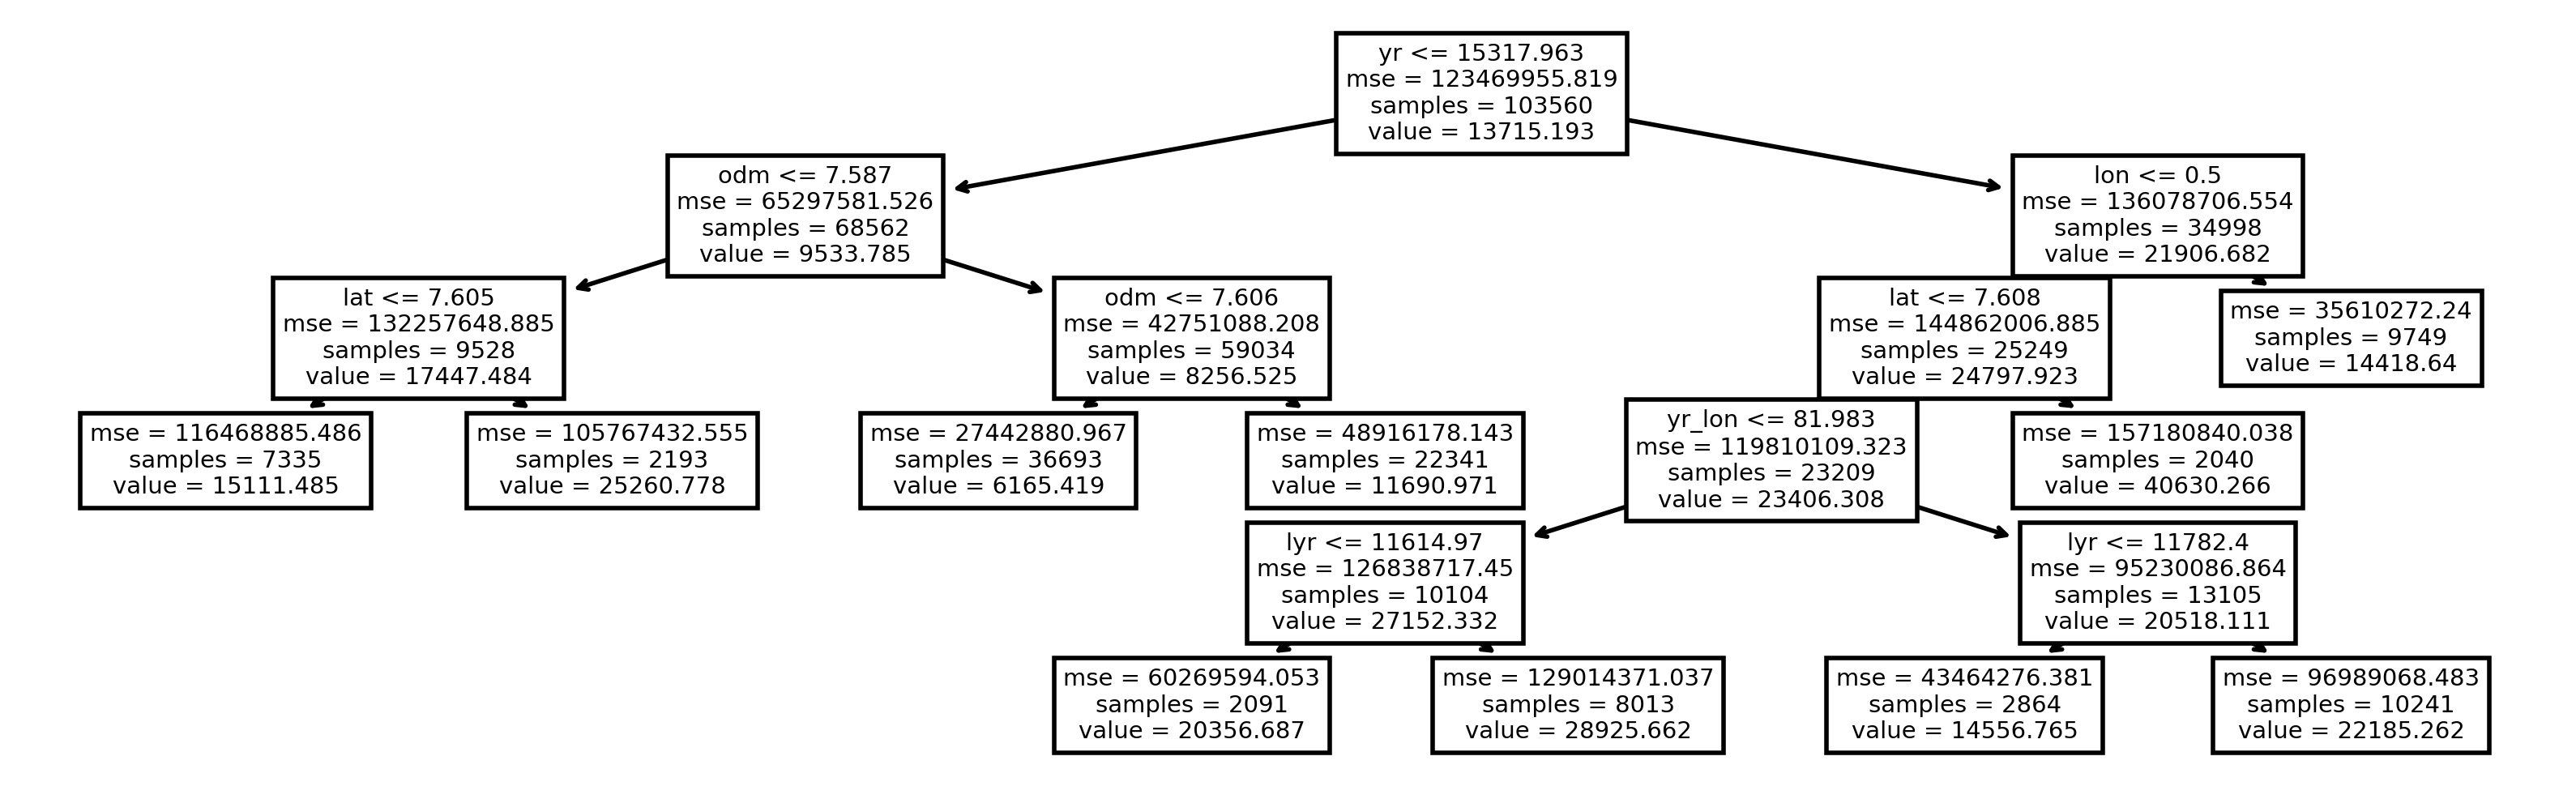

In [122]:
tree = DecisionTreeRegressor(max_leaf_nodes=10)
tree.fit(X_train_expl,y_train)
plt.figure(figsize=(10, 3), dpi=400)
tree_dot = plot_tree(tree, feature_names=X_train_ini_imp.columns )

### 6.3 Conlusion on Interpretability <a class="anchor" id="6.3."></a>
[Back to Contents](#0.)

From the two fitted models above we can conclude that it is not possible to fit a model with few variables that reach an $R^2$ that is near our best model, never the less from the to proposals we the reduce tree with 10 leafs bets our baseline model. Furthermore, the features that drive the model area really easy to interpret, year (and some transformations), location of the car (latitude and longitude), and odometer.